<a href="https://colab.research.google.com/github/tufanmaitydev/AI_ML/blob/master/EDA_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [0]:
# Suppress warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [0]:
import eda  #custom packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
#from sklearn import svm
from sklearn import tree
#from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc,precision_recall_curve, f1_score, make_scorer, precision_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
#from sklearn import linear_model
from itertools import chain
from collections import OrderedDict
from termcolor import colored, cprint
from datetime import date, timedelta
import operator
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Data Import

In [0]:
df = pd.read_excel("loan.xlsx")

In [0]:
train=df.copy()

In [0]:
desc = pd.read_excel('BankData_Dicti.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('max_colwidth', -1)
desc

,Sheet,LoanStatNew,Description
0,LoanStats,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,LoanStats,acc_open_past_24mths,Number of trades opened in past 24 months.
2,LoanStats,addr_state,The state provided by the borrower in the loan application
3,LoanStats,all_util,Balance to credit limit on all trades
4,LoanStats,annual_inc,The self-reported annual income provided by the borrower during registration.
5,LoanStats,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,LoanStats,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,LoanStats,avg_cur_bal,Average current balance of all accounts
8,LoanStats,bc_open_to_buy,Total open to buy on revolving bankcards.
9,LoanStats,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [0]:
train.shape

(39717, 111)

import pandas_profiling as pdp
profile= pdp.ProfileReport(train)
profile.to_file(output_file="overview.html")

## Data Treatment and Analysis

In [0]:
print("Unique values of id :",len(train['id'].unique()))
print("Unique values of member_id :",len(train['member_id'].unique()))

Unique values of id : 39717
Unique values of member_id : 39717


###  <font color='blue'>Assuming that member_id has been uniquely generated after due verification,</font> <font color='red'>no member has been granted loans more than once</font> 

In [0]:
train['desc'].head(5)

0      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possibl

In [0]:
train=train.drop(['id','member_id','url','desc'], axis=1)

### Removing Columns with more than 60% empty

<Figure size 1080x360 with 0 Axes>

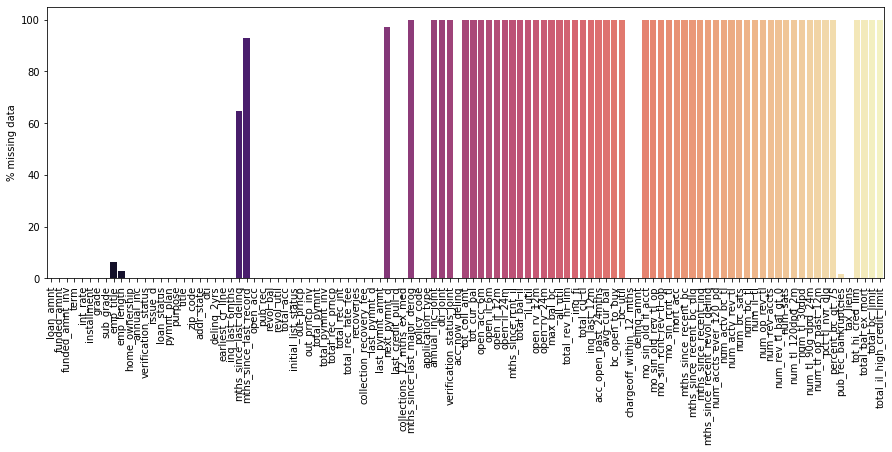

In [0]:
null_columns = train.columns[train.isnull().any()]
null_perc =100* train.isnull().sum()/train.isnull().count()
plt.figure(figsize=(15,5))
ax = sns.barplot(x = np.arange(len(null_perc)), y =null_perc, palette="magma")
ax = plt.xticks(np.arange(len(null_perc)),null_perc.index,rotation=90)
ax = plt.ylabel('% missing data')

###  <font color='blue'></font>  <font color='red'>Lot of data has not been captured</font> 

In [0]:
for i in null_columns:
    if train[i].isnull().sum()>0.60*len(train):
        train=train.drop([i], axis=1)
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

emp_title                     2459
emp_length                    1075
title                         12  
revol_util                    50  
last_pymnt_d                  71  
last_credit_pull_d            2   
collections_12_mths_ex_med    56  
chargeoff_within_12_mths      56  
pub_rec_bankruptcies          697 
tax_liens                     39  
dtype: int64

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null datetime64[ns]
loan_status                   39717 non-null object
pymnt_plan                    39717 non-null object
purpose                       39717 non-null obje

### Removing Columns with 100% unique

In [0]:
num_attributes = train.select_dtypes(include=['int','int64','float','float64']).columns
cat_attributes = train.select_dtypes(include=['object']).columns

In [0]:
for i in num_attributes:
    if train[i].min() == train[i].max():
        print(i)
        train=train.drop([i], axis=1)

collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [0]:
df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [0]:
df['policy_code'].unique()

array([1], dtype=int64)

###  <font color='blue'></font>  <font color='red'>Policy Code was made publicly available for all Loans</font> 

In [0]:
df['acc_now_delinq'].unique()

array([0], dtype=int64)

###  <font color='blue'></font>  <font color='red'>No borrower is currently delinquent</font> 

In [0]:
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [0]:
df['delinq_amnt'].unique()

array([0], dtype=int64)

In [0]:
df['tax_liens'].unique()

array([ 0., nan])

In [0]:
for i in cat_attributes:
    if len(train[i].dropna().unique()) < 2:
        print(i,":",train[i].unique())
        train=train.drop([i], axis=1)

pymnt_plan : ['n']
initial_list_status : ['f']
application_type : ['INDIVIDUAL']


In [0]:
df['pymnt_plan'].unique()

array(['n'], dtype=object)

###  <font color='blue'></font>  <font color='red'>No payment plan was put in place for any of the Loans</font> 

In [0]:
df['initial_list_status'].unique()

array(['f'], dtype=object)

###  <font color='blue'></font>  <font color='red'>Fractional listing was considered for all of the Loans</font> 

In [0]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

###  <font color='blue'></font>  <font color='red'>All loans were applied as individuals and not as  co-borrowers</font>  

In [0]:
num_attributes = train.select_dtypes(include=['int','int64','float','float64']).columns
cat_attributes = train.select_dtypes(include=['object']).columns
dat_attributes = train.select_dtypes(include=['datetime64']).columns

In [0]:
print(train.shape)

(39717, 41)


#### 70 Columns have been dropped 

### Describing the Attributes

In [0]:
## Numerical
for i in num_attributes:
        print('\033[1m',i,'\033[0m',train[i].describe())
        IQR = train[i].quantile(0.75)-train[i].quantile(0.25)
        uc = train[i].quantile(0.75) + 1.5 * IQR
        lc = train[i].quantile(0.25) - 1.5 * IQR
        print("IQR :\t",IQR)
        print("Cutoff :",uc)
        if train[i].max() > uc:
            cprint("Upper side Outlier is present!",'red')
        if train[i].min() < lc:
            cprint("Lower side Outlier is present!",'red')
        print("\n")

 loan_amnt  count    39717.000000
mean     11219.443815
std      7456.670694 
min      500.000000  
25%      5500.000000 
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
IQR :	 9500.0
Cutoff : 29250.0
Upper side Outlier is present!


 funded_amnt  count    39717.000000
mean     10947.713196
std      7187.238670 
min      500.000000  
25%      5400.000000 
50%      9600.000000 
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
IQR :	 9600.0
Cutoff : 29400.0
Upper side Outlier is present!


 funded_amnt_inv  count    39717.000000
mean     10397.448868
std      7128.450439 
min      0.000000    
25%      5000.000000 
50%      8975.000000 
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64
IQR :	 9400.0
Cutoff : 28500.0
Upper side Outlier is present!


 int_rate  count    39717.000000
mean     0.120212    
std      0.037248    
min      0.054200    
25%      0.092500    
50%      0.

In [0]:
## Categorical
for i in cat_attributes:
        print('\033[1m',i,'\033[0m',train[i].describe())
        print(train[i].unique())
        print("\n")

 term  count     39717     
unique    2         
top        36 months
freq      29096     
Name: term, dtype: object
[' 36 months' ' 60 months']


 grade  count     39717
unique    7    
top       B    
freq      12020
Name: grade, dtype: object
['B' 'C' 'A' 'E' 'F' 'D' 'G']


 sub_grade  count     39717
unique    35   
top       B3   
freq      2917 
Name: sub_grade, dtype: object
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


 emp_title  count     37258  
unique    28820  
top       US Army
freq      134    
Name: emp_title, dtype: object
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']


 emp_length  count     38642    
unique    11       
top       10+ years
freq      8879     
Name: emp_length, dtype: object
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '

In [0]:
## Date Time
for i in dat_attributes:
        print('\033[1m',i,'\033[0m',train[i].describe())
        #print(train[i].unique())
        print("\n")

 issue_d  count     39717              
unique    55                 
top       2011-12-01 00:00:00
freq      2260               
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object


 earliest_cr_line  count     39717              
unique    526                
top       1998-11-01 00:00:00
freq      370                
first     1946-01-01 00:00:00
last      2008-11-01 00:00:00
Name: earliest_cr_line, dtype: object


 last_pymnt_d  count     39646              
unique    101                
top       2016-05-01 00:00:00
freq      1256               
first     2008-01-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object


 last_credit_pull_d  count     39715              
unique    106                
top       2016-05-01 00:00:00
freq      10308              
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object




## Correlation Analysis and MultiCollinearity

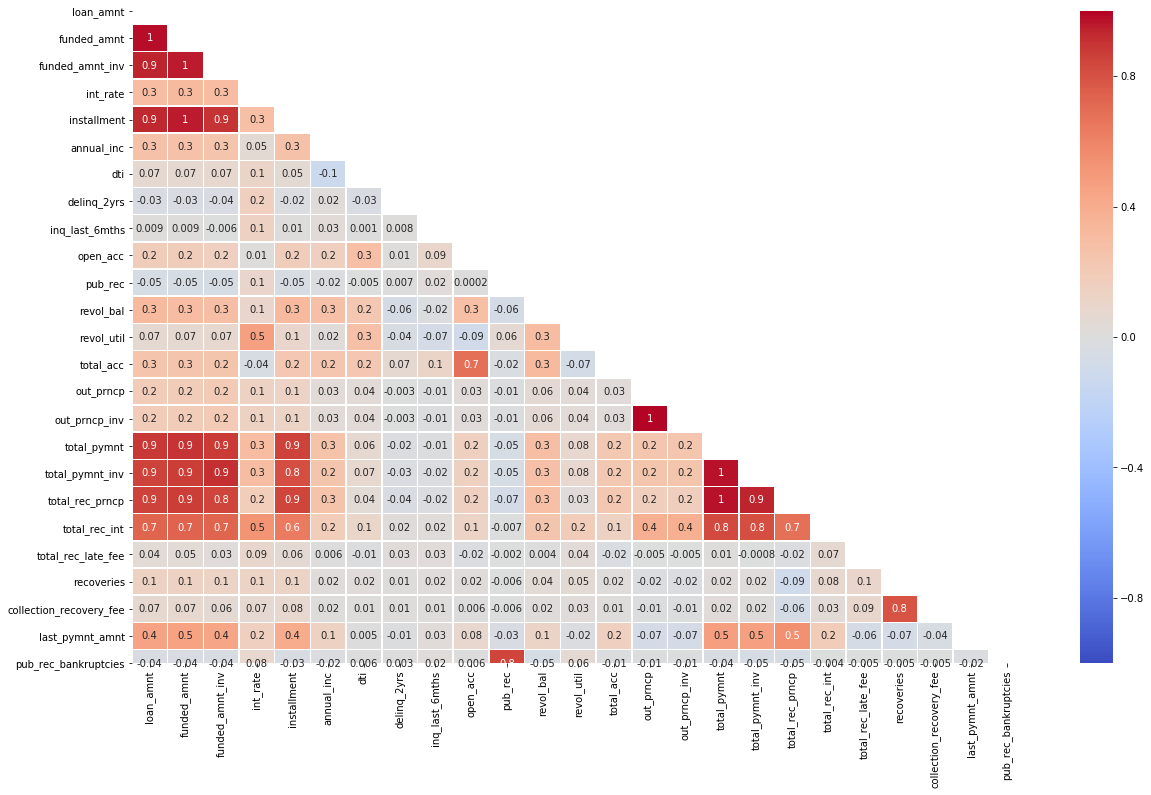

In [0]:
mask = np.triu(train.corr())
fig, ax = plt.subplots(figsize=(20,12))         
sns.heatmap(train.corr(),annot=True,linewidths=.5,ax=ax,vmin=-1,fmt='.1g',mask=mask,cmap='coolwarm')

In [0]:
np.abs(train.corr()).unstack().sort_values(ascending = False).drop_duplicates()

pub_rec_bankruptcies     pub_rec_bankruptcies       1.000000
out_prncp                out_prncp_inv              0.999827
funded_amnt              loan_amnt                  0.981578
total_pymnt              total_rec_prncp            0.971472
                         total_pymnt_inv            0.970815
funded_amnt_inv          funded_amnt                0.958422
installment              funded_amnt                0.956159
loan_amnt                funded_amnt_inv            0.940034
total_rec_prncp          total_pymnt_inv            0.939581
loan_amnt                installment                0.930288
funded_amnt_inv          total_pymnt_inv            0.913257
installment              funded_amnt_inv            0.905039
funded_amnt              total_pymnt                0.903160
total_pymnt              loan_amnt                  0.886613
                         funded_amnt_inv            0.881228
funded_amnt              total_pymnt_inv            0.870799
                        

In [0]:
j=0
temp=train[num_attributes].dropna()
ds = pd.DataFrame(columns=['feature','vif'])
vif = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
for i in range(temp.shape[1]):
    ds.loc[j, ['feature']]=temp.columns[i]
    ds.loc[j, ['vif']]= vif[i]
    j=j+1
sorted(zip(ds['vif'],ds['feature']),reverse=True)

[(33484012099408.89, 'total_pymnt'),
 (21243394468728.754, 'total_rec_prncp'),
 (1751010741590.395, 'total_rec_int'),
 (69852490614.21829, 'recoveries'),
 (7626715.166428163, 'total_rec_late_fee'),
 (2983.51477711168, 'out_prncp'),
 (2982.4745719519883, 'out_prncp_inv'),
 (561.5182710782145, 'funded_amnt'),
 (460.47508399604953, 'total_pymnt_inv'),
 (393.06070532504526, 'funded_amnt_inv'),
 (92.53627844342651, 'loan_amnt'),
 (59.45949558248489, 'installment'),
 (14.66626870308709, 'int_rate'),
 (11.24782378297596, 'open_acc'),
 (10.012543250757174, 'total_acc'),
 (6.907782514015969, 'revol_util'),
 (6.1409628757859265, 'dti'),
 (3.7698423129980814, 'pub_rec'),
 (3.7148484597018125, 'pub_rec_bankruptcies'),
 (2.8421988231169215, 'collection_recovery_fee'),
 (2.6324146039895253, 'annual_inc'),
 (2.5136965990717464, 'last_pymnt_amnt'),
 (2.4910572020190256, 'revol_bal'),
 (1.7818294286072596, 'inq_last_6mths'),
 (1.1789038111520727, 'delinq_2yrs')]

###  <font color='blue'></font>  <font color='red'>It is evident that total_pymnt is highly correlated with total_rec_prncp and total_rec_int</font>  

In [0]:
temp=train[num_attributes].dropna()
temp=temp.drop(['out_prncp_inv','total_rec_prncp','total_rec_int','funded_amnt','total_pymnt_inv','funded_amnt_inv','installment','total_pymnt'], axis=1)
#np.abs(temp.corr()).unstack().sort_values(ascending = False).drop_duplicates().head(10)

In [0]:
j=0
ds = pd.DataFrame(columns=['feature','vif'])
vif = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
for i in range(temp.shape[1]):
    ds.loc[j, ['feature']]=temp.columns[i]
    ds.loc[j, ['vif']]= vif[i]
    j=j+1

Text(0, 0.5, 'Variance Inflation Factor Value')

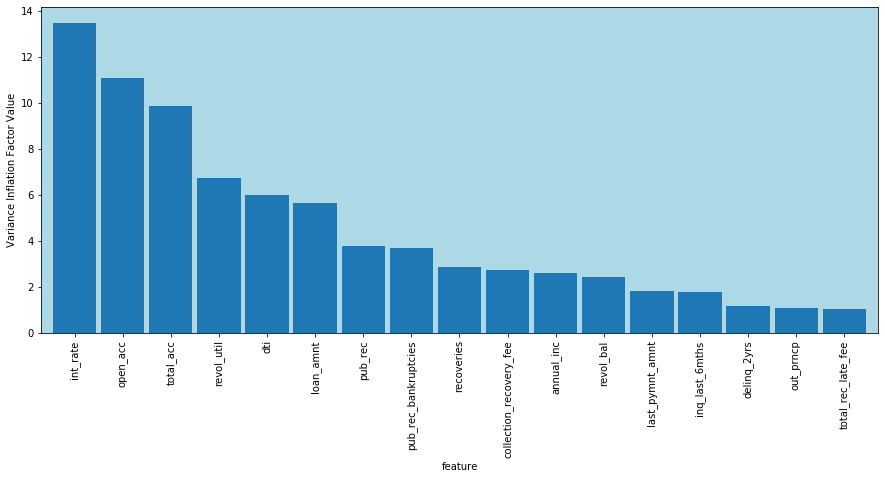

In [0]:
ncomp = 20
ds.set_index(ds['feature'], inplace=True)
ax = ds.sort_values('vif', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,6))
ax.set_facecolor('lightblue')
ax.set_ylabel('Variance Inflation Factor Value')

###  <font color='blue'></font>  <font color='red'>Following features suffer from multicollinearity:</font>  
'out_prncp_inv',
'total_rec_prncp',
'total_rec_int',
'funded_amnt',
'total_pymnt_inv',
'funded_amnt_inv',
'installment',
'total_pymnt'
'int_rate'

MuCo=['int_rate','term_mnths','loan_amnt']
sns.pairplot(train, x_vars=MuCo, y_vars=MuCo,height=4, aspect=0.7, kind='reg', markers="+")

## Feature Engineering

train['zip_code']=train['zip_code'].str[:3]

In [0]:
train['issue_mnth'] = train['issue_d'].map(lambda x : x.month) 
train['issue_year'] = train['issue_d'].map(lambda x : x.year)
train['earliest_cr_year'] = train['earliest_cr_line'].map(lambda x : x.year)

In [0]:
#ratio of the repayment amount to the borrower’s monthly income if the loan is approved
train['new_dti'] = (train['dti']*(train['annual_inc']/12)+train['installment'])/(train['annual_inc']/12)

In [0]:
list(zip(train['dti'],train['new_dti']))

[(27.65, 27.731435),
 (1.0, 1.023932),
 (8.72, 8.802595494613126),
 (20.0, 20.082758536585366),
 (17.94, 17.9501685),
 (11.2, 11.252153333333332),
 (23.51, 23.55342098544805),
 (5.35, 5.3773575000000005),
 (5.55, 5.595717),
 (18.08, 18.177159999999997),
 (16.12, 16.145575),
 (10.78, 10.844406399999999),
 (10.08, 10.202152),
 (12.56, 12.637344),
 (7.06, 7.0990888),
 (20.31, 20.325132857142854),
 (18.6, 18.69942285714286),
 (10.52, 10.531953090909091),
 (18.44, 18.46835142857143),
 (9.86, 9.903420711379011),
 (26.53, 26.664091768503575),
 (13.22, 13.300197714285714),
 (11.18, 11.2593824),
 (16.01, 16.0893824),
 (2.4, 2.431335789473684),
 (29.44, 29.503049565217392),
 (15.22, 15.322928),
 (13.97, 13.999673626109912),
 (5.63, 5.644978490566038),
 (12.19, 12.324952000000001),
 (20.34, 20.43547112462006),
 (14.03, 14.189331200000002),
 (22.83, 22.930125),
 (11.93, 12.00923972716686),
 (6.35, 6.436812941176471),
 (11.8, 11.918217560975611),
 (5.5, 5.575119792790848),
 (8.48, 8.605162666666667

train['delinquency']=

In [0]:
# Removing "months" from "term" column and renaming the column name
train['term']=train['term'].str.replace('months','')
train['term']=train['term'].str.strip()
train['term']=train['term'].astype('int64')
train.rename(columns={'term':'term_mnths'}, inplace=True)

In [0]:
# Converting "int_rate" and "revol_util" to percentage values
train['int_rate']=100*train['int_rate']
train['revol_util']=100*train['revol_util']

## Univariate Analysis

In [0]:
train['funded_amnt'].mean() / train['loan_amnt'].mean()

0.9757803841606418

In [0]:
train['total_pymnt'].mean() / train['loan_amnt'].mean()

1.0832619463178395

 The Loan Amounts of Applicants   centered at 10000.0


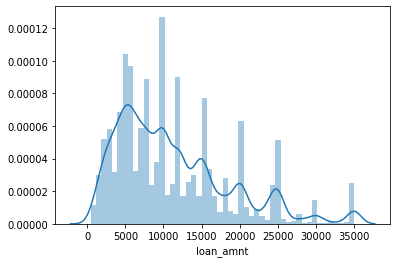

In [0]:
print("\033[1m The Loan Amounts of Applicants \033[0m"," centered at",train['loan_amnt'].median())
sns.distplot(train['loan_amnt'])

###  <font color='blue'></font>  <font color='red'>The distribution of Loan Amounts of applicants can be seen above having median at 10000</font> 

 Loan Terms of Applicants 


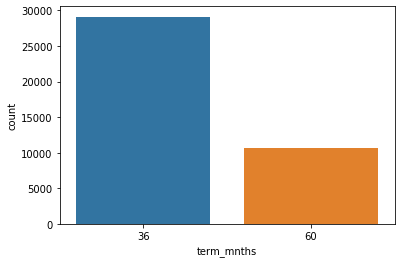

In [0]:
print("\033[1m Loan Terms of Applicants \033[0m")
sns.countplot(x='term_mnths', data=train.sort_values("term_mnths"))

###  <font color='blue'></font>  <font color='red'>Majority of the applicants have loan term of 36 months</font> 

Interest Rate of Applicants  centered at 11.86


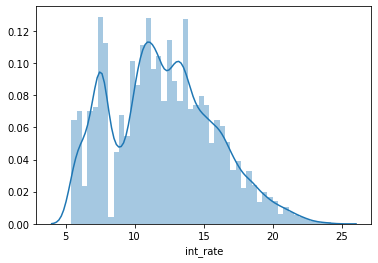

In [0]:
print("\033[1mInterest Rate of Applicants \033[0m","centered at",train['int_rate'].median())
sns.distplot(train["int_rate"])

###  <font color='blue'></font>  <font color='red'>The distribution of Interest Rates of the loans can be seen above having median at 11.86 %</font> 

 Grade of Applicants 


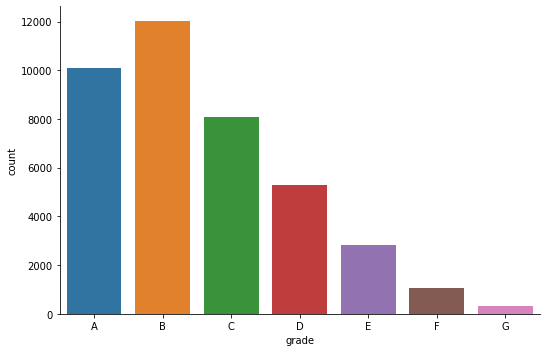

In [0]:
print("\033[1m Grade of Applicants \033[0m")
ax = sns.catplot(x='grade', data=train.fillna('NA'), aspect=1.5, kind="count",order=['A','B','C','D','E','F','G'])

 Sub Grade of Applicants 


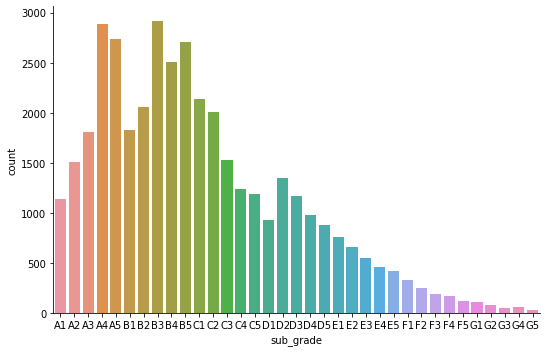

In [0]:
print("\033[1m Sub Grade of Applicants \033[0m")
g = sns.catplot(x='sub_grade', data=train.fillna('NA'), aspect=1.5, kind="count",
                order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5',
                       'D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])

###  <font color='blue'></font>  <font color='red'>Majority of the loans are high grade belonging to A or B </font> 

In [0]:
di = {'U.S. Army': 'US Army', 
      'US ARMY' : 'US Army',
      'us army' : 'US Army',
      'United States Army' : 'US Army',
      'Army' : 'US Army',
      'JP Morgan Chase'  : 'JPMorgan Chase',
      'United States Air Force' : 'US Air Force',
      'U.S. Air Force' : 'US Air Force',
      'USAF' : 'US Air Force',
      'at&t' : 'AT&T',
      'Wal-Mart' : 'Walmart',
      'WalMart' : 'Walmart',
      'walmart' : 'Walmart',
      'United States Postal Service' : 'US Postal Service',
      'USPS' : 'US Postal Service',
      'usps' : 'US Postal Service',
      'us postal service' : 'US Postal Service',
      'UPS' : 'United Parcel Service',
      'self' : 'Self Employed',
      'Self' : 'Self Employed',
      'Self-employed' : 'Self Employed',
      'verizon wireless' : 'Verizon',
      'Verizon Wireless' : 'Verizon',
      'Wells Fargo Bank' : 'Wells Fargo',
      'bank of america' : 'Bank of America',
      'walgreens' : 'Walgreens',
      'United States Navy' : 'US Navy',
      'Military' : 'US Army',
      'home depot' : 'The Home Depot',
      'Morgan Stanley Smith Barney' : 'Morgan Stanley',
      'The Boeing Company' : 'Boeing'
     }
train['emp_title'].replace(di, inplace=True)

 Employment Title of Applicants 


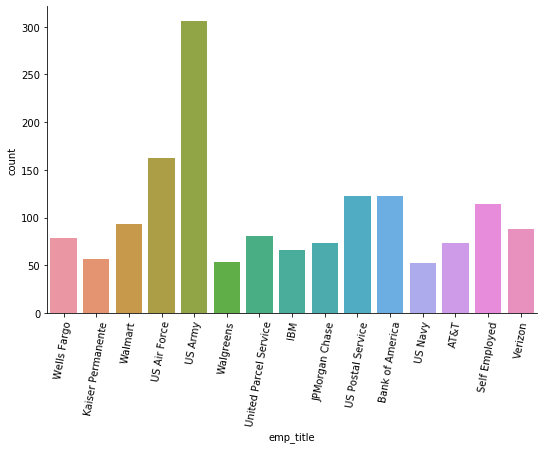

In [0]:
feature='emp_title'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
print("\033[1m Employment Title of Applicants \033[0m")
g = sns.catplot(x=feature, data=temp.fillna('NA'), aspect=1.5, kind="count")
g.set_xticklabels(rotation=80)

###  <font color='blue'></font>  <font color='red'>Majority of the applicants are from the US Army followed by US Air Force and US Postal Service</font> 

In [0]:
di = {'< 1 year': 0, 
      '1 year'  : 1,
      '2 years' : 2,
      '3 years' : 3,
      '4 years' : 4,
      '5 years' : 5,
      '6 years' : 6,
      '7 years' : 7,
      '8 years' : 8,
      '9 years' : 9,
      '10+ years' : 10
     }
train['emp_length'].replace(di, inplace=True)

 Employment Length of Applicants 


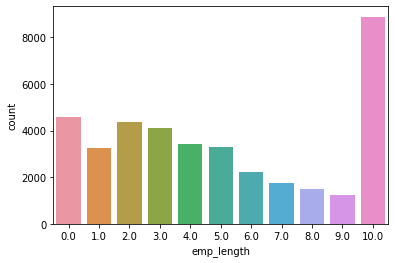

In [0]:
print("\033[1m Employment Length of Applicants \033[0m")
sns.countplot(x='emp_length', data=train.sort_values("emp_length"))

###  <font color='blue'></font>  <font color='red'>A significant majority of the applicants have employment length of more than 10 years</font> 

 Home ownership of Applicants 


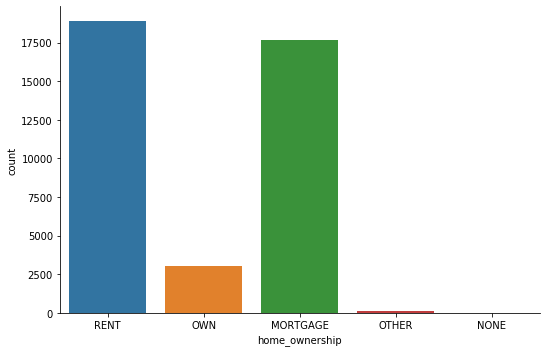

In [0]:
print("\033[1m Home ownership of Applicants \033[0m")
g = sns.catplot(x='home_ownership', data=train.fillna('NA'), aspect=1.5, kind="count")

###  <font color='blue'></font>  <font color='red'>Majority of the applicants are yet to own a home and are currently on rent or under mortage</font> 

 The Annual Income Range of Applicants   centered at 59000.0 max at 6000000.0


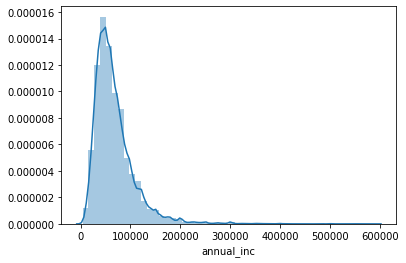

In [0]:
print("\033[1m The Annual Income Range of Applicants \033[0m"," centered at",train['annual_inc'].median(),"max at",train['annual_inc'].max())
sns.distplot(train['annual_inc'][train['annual_inc'] < 600000])

###  <font color='blue'></font>  <font color='red'>The distribution of annual income range of applicants can be seen above with median at 59000 and upper side outliers</font> 

 Verification Status of Applicants 


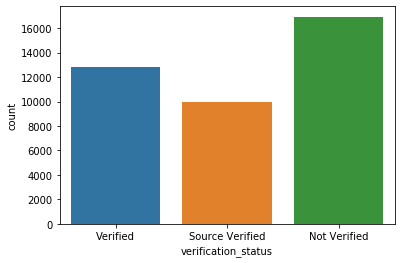

In [0]:
print("\033[1m Verification Status of Applicants \033[0m")
sns.countplot(x='verification_status', data=train.fillna('NA'))

###  <font color='blue'></font>  <font color='red'>Income for a lot of the loans havent been verified</font> 

 Loan Status of Applicants 


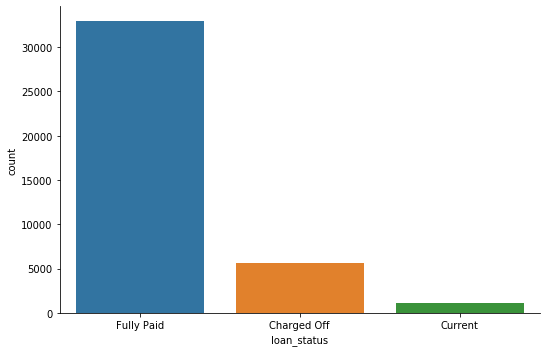

In [0]:
print("\033[1m Loan Status of Applicants \033[0m")
g = sns.catplot(x='loan_status', data=train.fillna('NA'), aspect=1.5, kind="count")

###  <font color='blue'></font>  <font color='red'>Majority of the applicants have fully paid their loans while 14% of the applicants have defaulted</font> 

 Loan Purpose of Applicants 


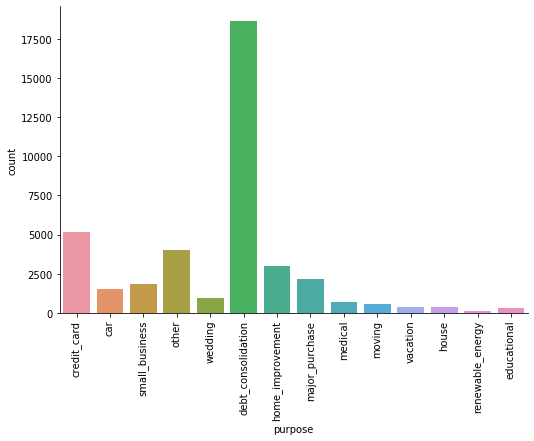

In [0]:
print("\033[1m Loan Purpose of Applicants \033[0m")
g = sns.catplot(x='purpose', data=train.fillna('NA'), aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

###  <font color='blue'></font>  <font color='red'>A significant majority of the applicants have considered loans for debt consolidation</font> 

In [0]:
train['title'][train['title']=='Loan']='Other'
train['title']=train['title'].str.replace('Loan','')
train['title']=train['title'].str.strip()
train['title']=train['title'].str.capitalize()

 Loan Title of Applicants 


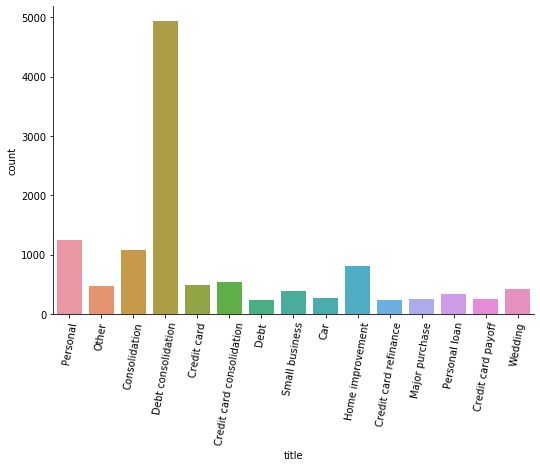

In [0]:
feature='title'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
print("\033[1m Loan Title of Applicants \033[0m")
g = sns.catplot(x=feature, data=temp.fillna('NA'), aspect=1.5, kind="count")
g.set_xticklabels(rotation=80)

 Zip Codes of Applicants 


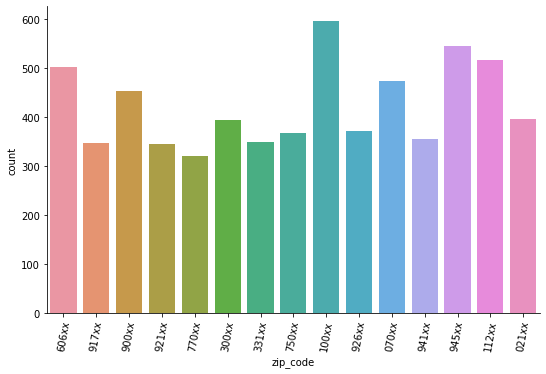

In [0]:
feature='zip_code'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
print("\033[1m Zip Codes of Applicants \033[0m")
g = sns.catplot(x=feature, data=temp.fillna('NA'), aspect=1.5, kind="count")
g.set_xticklabels(rotation=80)

###  <font color='blue'></font>  <font color='red'>Many applicants are from areas around Zip Code 100XX i.e. New York</font> 

 Address State of Applicants 


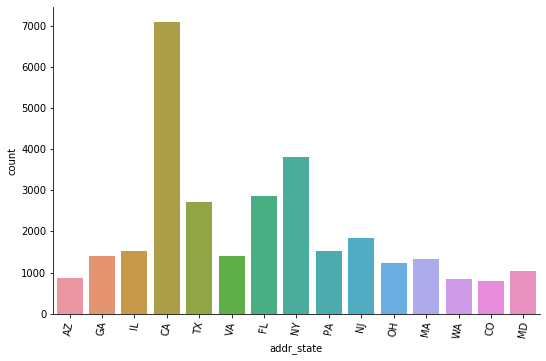

In [0]:
feature='addr_state'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
print("\033[1m Address State of Applicants \033[0m")
g = sns.catplot(x=feature, data=temp.fillna('NA'), aspect=1.5, kind="count")
g.set_xticklabels(rotation=80)

###  <font color='blue'></font>  <font color='red'>A significant number of the applicants are from California followed by New York, Florida and Texas, which are all populous states</font> 

 Debt to Income Ratio of Applicants   centered at 13.4


<Figure size 864x288 with 0 Axes>

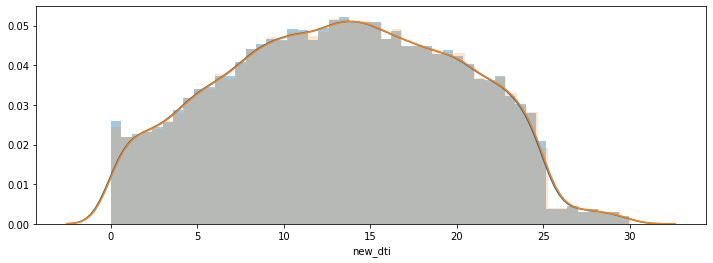

In [0]:
print("\033[1m Debt to Income Ratio of Applicants \033[0m"," centered at",train['dti'].median())
plt.figure(figsize=(12,4))
ax = sns.distplot(train["dti"])
ax = sns.distplot(train["new_dti"],hist_kws=dict(alpha=0.2))

###  <font color='blue'></font>  <font color='red'>The distribution of debt to income ratio of applicants can be seen above with median at 13.4</font> 

 30+ days past-due incidences of Applicants 


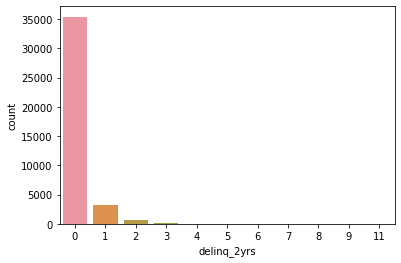

In [0]:
print("\033[1m 30+ days past-due incidences of Applicants \033[0m")
sns.countplot(x='delinq_2yrs', data=train.sort_values("delinq_2yrs"))

###  <font color='blue'></font>  <font color='red'>Majority of the applicants  had zero 30+ days due incidences in past 2 years</font>

 Number of inquiries in past 6 months of Applicants 


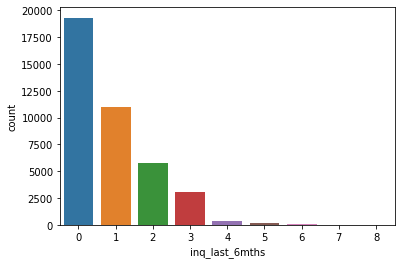

In [0]:
print("\033[1m Number of inquiries in past 6 months of Applicants \033[0m")
sns.countplot(x='inq_last_6mths', data=train.sort_values("inq_last_6mths"))

<Figure size 1080x720 with 0 Axes>

 Number of open credit lines of Applicants 


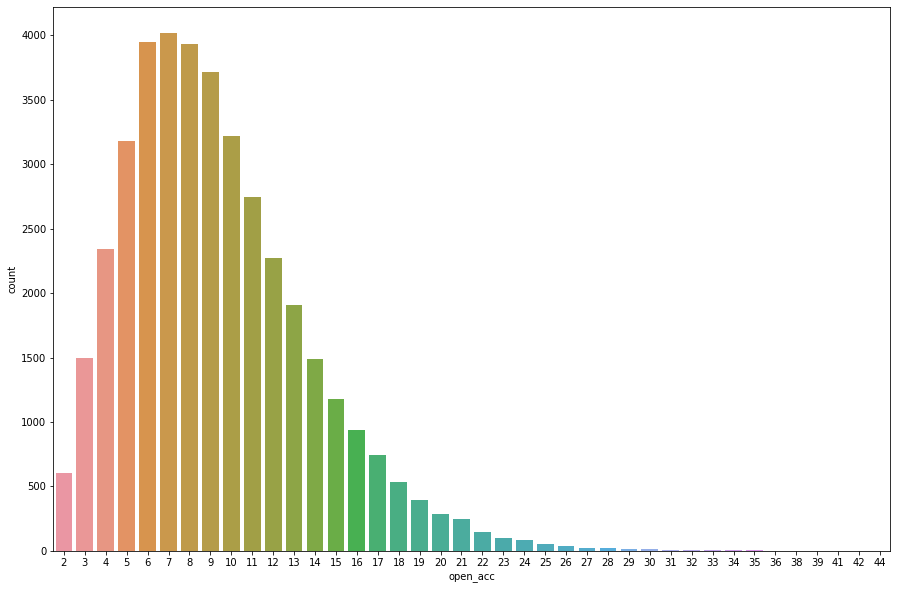

In [0]:
plt.figure(figsize=(15,10))
print("\033[1m Number of open credit lines of Applicants \033[0m")
sns.countplot(x='open_acc', data=train.sort_values("open_acc"))

 Number of derogatory public records of Applicants 


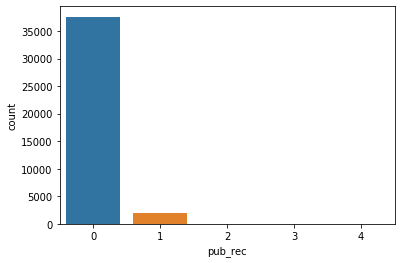

In [0]:
print("\033[1m Number of derogatory public records of Applicants \033[0m")
sns.countplot(x='pub_rec', data=train.sort_values("pub_rec"))

###  <font color='blue'></font>  <font color='red'>Majority of the applicants  have zero derogatory public records</font>

 Credit revolving balance of Applicants   centered at 8850.0


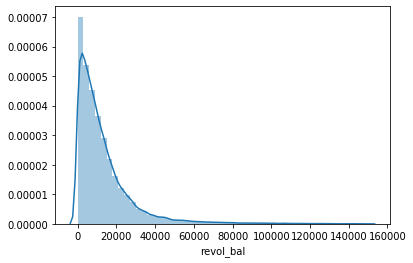

In [0]:
print("\033[1m Credit revolving balance of Applicants \033[0m"," centered at",train['revol_bal'].median())
sns.distplot(train["revol_bal"],bins=50)

###  <font color='blue'></font>  <font color='red'>The distribution of Total credit revolving balance of applicants can be seen above with median at 8850</font> 

 Revolving line Utilization rate of Applicants   centered at 49.3


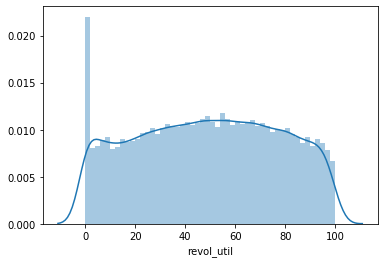

In [0]:
print("\033[1m Revolving line Utilization rate of Applicants \033[0m"," centered at",train['revol_util'].median())
sns.distplot(train["revol_util"],bins=50)

###  <font color='blue'></font>  <font color='red'>The distribution of Revolving line utilization rate of applicants can be seen above with median at 49.3%</font> 

<Figure size 1080x720 with 0 Axes>

 Number of total credit lines in file of Applicants  centered at 20.0


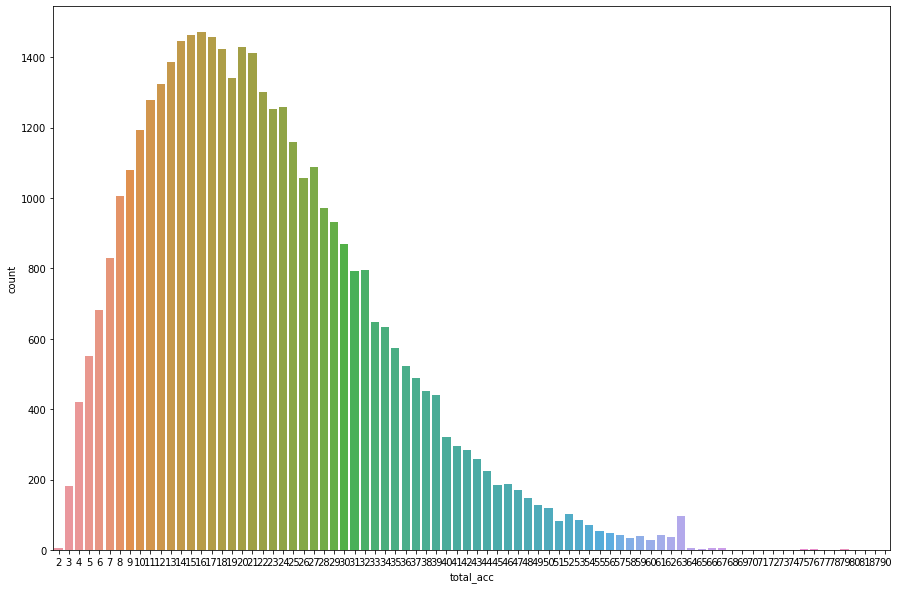

In [0]:
plt.figure(figsize=(15,10))
print("\033[1m Number of total credit lines in file of Applicants \033[0m","centered at",train['total_acc'].median())
sns.countplot(x='total_acc', data=train.sort_values("total_acc"))

## Univariate : Analysis over time

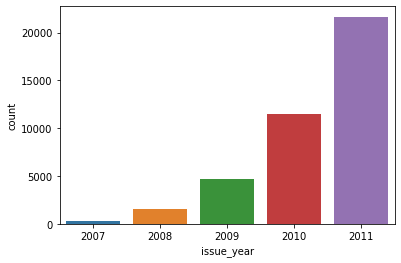

In [0]:
sns.barplot(x="issue_year",y="count",data=train.groupby('issue_year')['issue_year'].count().reset_index(name= 'count'))

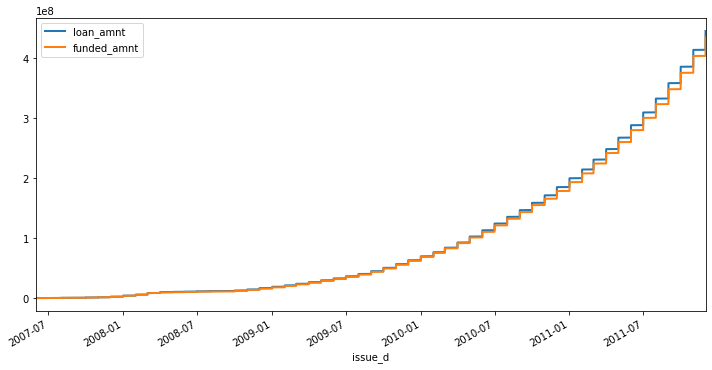

In [0]:
ts = train[['issue_d','loan_amnt','funded_amnt']]
#ts['c']=1
ts.set_index('issue_d', inplace=True)
#ts.plot(figsize=(12,6), linewidth=2, fontsize=10
ts.sort_index().cumsum().plot(figsize=(12,6), linewidth=2, fontsize=10)

###  <font color='blue'></font>  <font color='red'>Issuance of loans has increased exponentially across the years</font> 

groups = ts.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

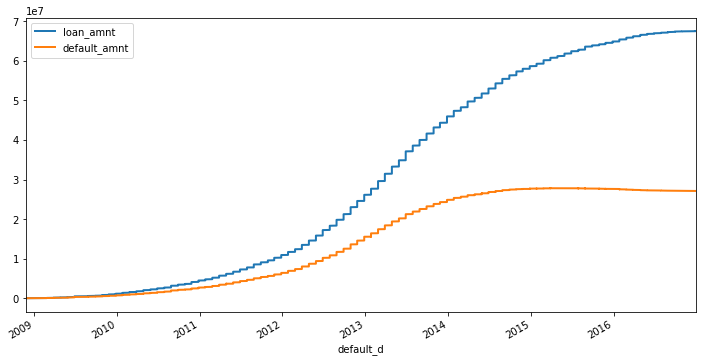

In [0]:
temp=df[df['loan_status']=='Charged Off']
temp=temp[['last_pymnt_d','loan_amnt','funded_amnt','total_pymnt']]
temp['default_amnt']=temp['funded_amnt']-temp['total_pymnt']
temp['default_d']=temp['last_pymnt_d'] + timedelta(270)
defaults= temp[['default_d','loan_amnt','default_amnt']]
defaults.set_index('default_d', inplace=True)
defaults.sort_index().cumsum().plot(figsize=(12,6), linewidth=2, fontsize=10)

###  <font color='blue'></font>  <font color='red'> Applications vs Defaults Volume across the years</font>

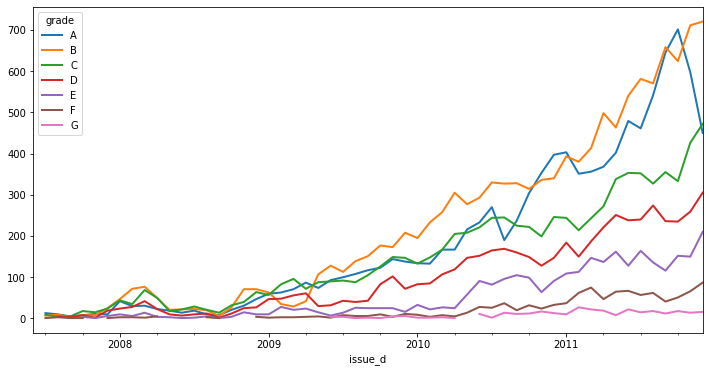

In [0]:
ts = train[['issue_d','grade','int_rate']]
ts = pd.pivot_table(ts,index=['issue_d'], columns='grade', values='int_rate', aggfunc=len)
ts.sort_index().plot(figsize=(12,6), linewidth=2, fontsize=10)

###  <font color='blue'></font>  <font color='red'> GradeWise Applications across the years</font>

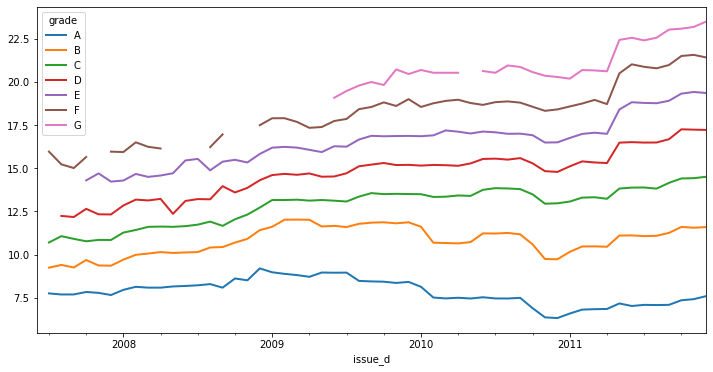

In [0]:
ts = train[['issue_d','grade','int_rate']]
ts = pd.pivot_table(ts,index=['issue_d'], columns='grade', values='int_rate', aggfunc=np.mean)
ts.sort_index().plot(figsize=(12,6), linewidth=2, fontsize=10)

###  <font color='blue'></font>  <font color='red'> Grade wise Average Interest rates have followed a trend across the years</font>

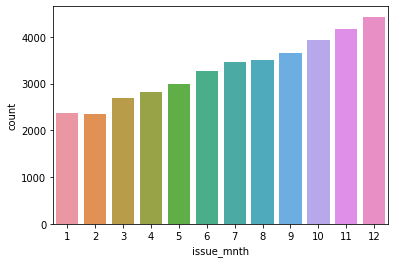

In [0]:
sns.barplot(x="issue_mnth",y="count",data=train.groupby('issue_mnth')['issue_mnth'].count().reset_index(name='count'))

###  <font color='blue'></font>  <font color='red'>Issuance of loans increases as the year end is approached</font> 

temp = train[['last_pymnt_d','grade','loan_status']]
temp['default_d']=temp['last_pymnt_d'] + timedelta(270)
ts = pd.pivot_table(ts,index=['default_d'], columns='grade', values='default_d', aggfunc=len)
ts.sort_index().plot(figsize=(12,6), linewidth=2, fontsize=10)

## Bivariate Analysis

In [0]:
num_attributes = train.select_dtypes(include=['int','int64','float','float64']).columns
cat_attributes = train.select_dtypes(include=['object']).columns
dat_attributes = train.select_dtypes(include=['datetime64']).columns

In [0]:
train.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Current,1140.0,17053.991228,8651.052316,1000.0,12000.0,15825.0,23000.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


##### Loans with a status of "Current" have not yet been issued or have not reached maturity and, therefore, do not contain information a borrower’s creditworthiness. 

In [0]:
train_c = train[train['loan_status'] == 'Current']
train = train[train['loan_status'] != 'Current']

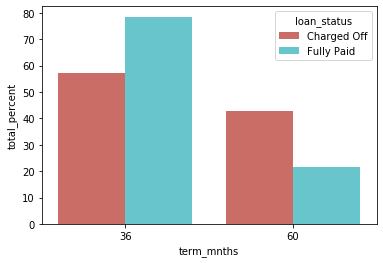

In [0]:
feature='term_mnths'
cmap='hls'
temp = train.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

###  <font color='blue'></font>  <font color='red'>Loans with term 60 months are more probable to default</font> 

<Figure size 576x288 with 0 Axes>

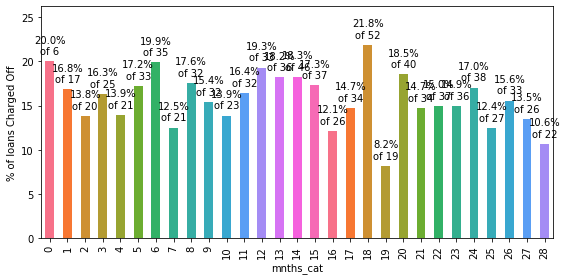

In [0]:
feature='mths_since_last_delinq'
bins = [i for i in range(0,30)]
labels = [i for i in range(0,29)]
temp=df.copy()
temp['mnths_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
feature='mnths_cat'
plt.figure(figsize=(8,4))
ax=eda.plotLoanStatus(temp, feature)

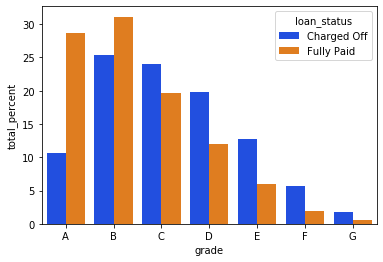

In [0]:
feature='grade'
cmap='bright'
temp = train.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)


###  <font color='blue'></font>  <font color='red'>There are more cases of loan default between Grade C to G</font> 

<Figure size 1440x720 with 0 Axes>

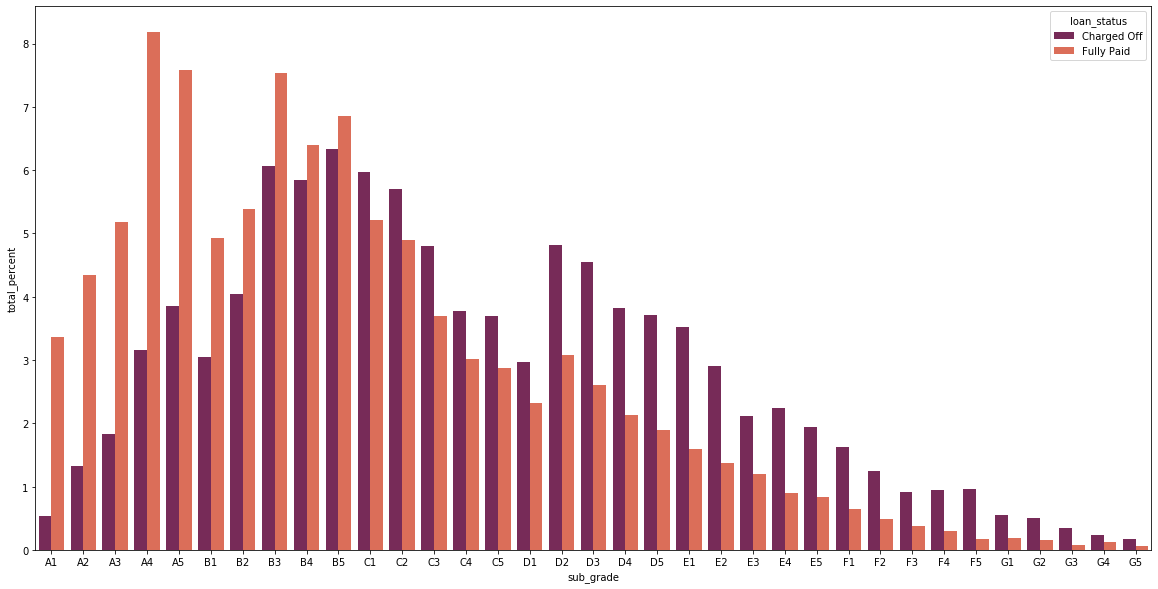

In [0]:
plt.figure(figsize=(20,10))
feature='sub_grade'
cmap='rocket'
temp = train.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

###  <font color='blue'></font>  <font color='red'>There are more cases of loan default between Sub Grade C1 to G5</font> 

<Figure size 864x432 with 0 Axes>

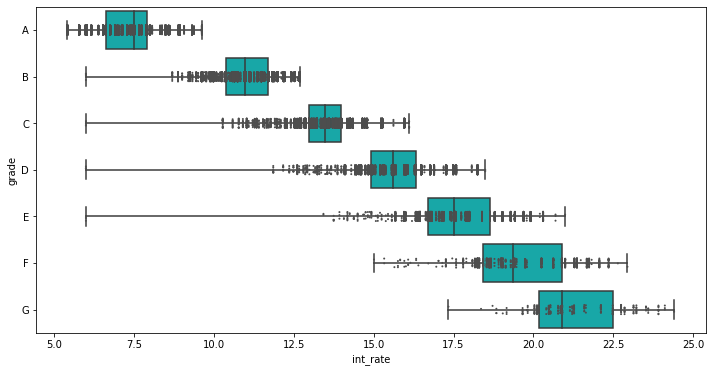

In [0]:
plt.figure(figsize=(12, 6))
ax=sns.boxplot(x='int_rate',y='grade',data=train, whis=np.inf, color="c",order=['A','B','C','D','E','F','G'])
ax=sns.stripplot(x='int_rate',y='grade',data=train,jitter=True,size=2,color=".3",linewidth=0,order=['A','B','C','D','E','F','G'])

###  <font color='blue'></font>  <font color='red'>The driving variable behind higher default rate with Grade is higher rates of interest which are imposed as the Grade declines from A to G</font> 

<Figure size 1440x720 with 0 Axes>

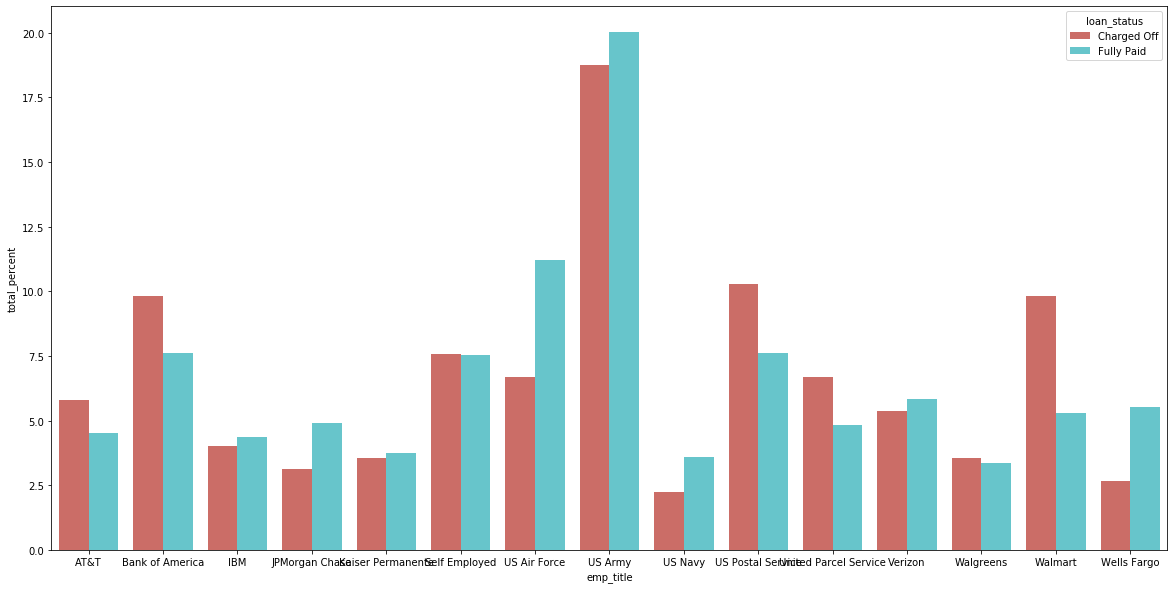

In [0]:
plt.figure(figsize=(20,10))
feature='emp_title'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='hls'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

###  <font color='blue'></font>  <font color='red'>Applicants from certain organizations like Walmart are more probable to default on their loans</font>

<Figure size 1440x720 with 0 Axes>

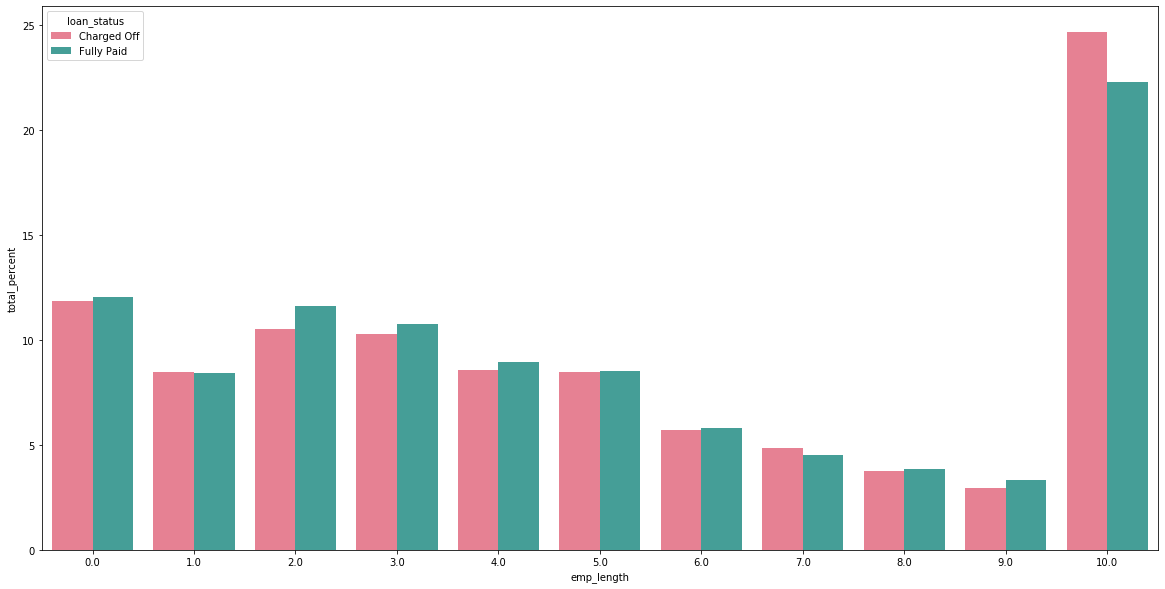

In [0]:
plt.figure(figsize=(20,10))
feature='emp_length'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='husl'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

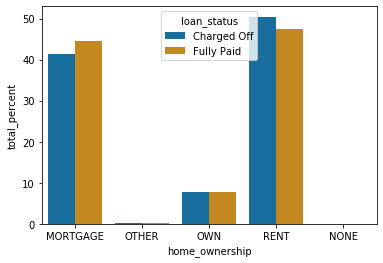

In [0]:
feature='home_ownership'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='colorblind'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

###  <font color='blue'></font>  <font color='red'>Applicants staying on rent are more probable to default on their loans</font> 

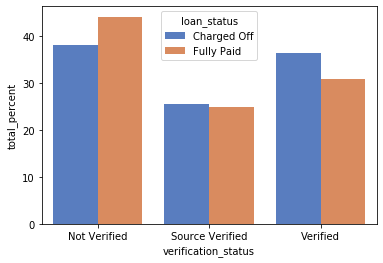

In [0]:
feature='verification_status'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='muted'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 1440x720 with 0 Axes>

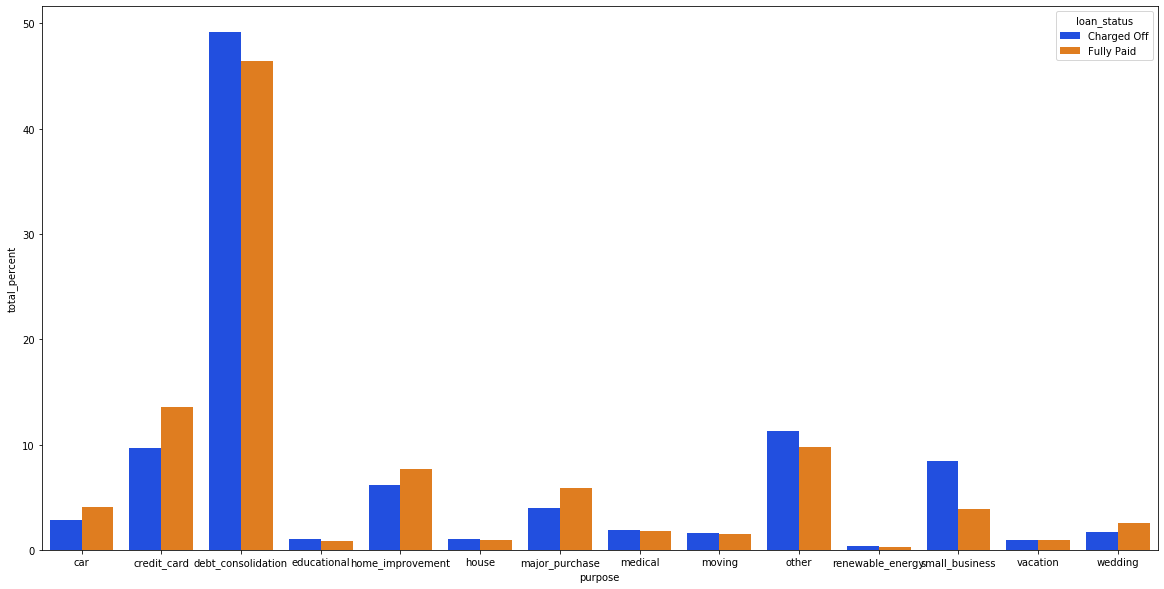

In [0]:
plt.figure(figsize=(20,10))
feature='purpose'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='bright'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

###  <font color='blue'></font>  <font color='red'>Loans with purpose 'small business' are more probable to default than getting paid</font> 

<Figure size 1440x720 with 0 Axes>

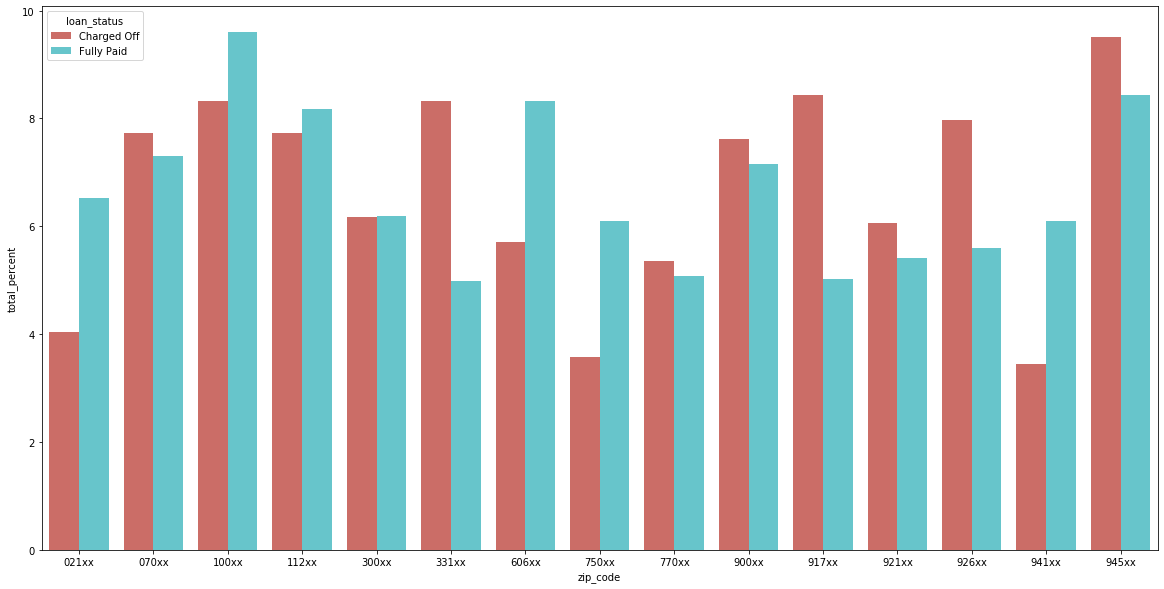

In [0]:
plt.figure(figsize=(20,10))
feature='zip_code'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='hls'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

###  <font color='blue'></font>  <font color='red'>Applicants from zip codes 331XX and 917XX are more probable to default on their loans</font> 

### Statewise Data

In [0]:
states = []
for i in df['addr_state']:
    if i not in states:
        states.append(i)

In [0]:
Loan_Amount = []
Average_Balance = []
Default_Rate = []
Weighted_Rate = []
Average_Income = []
Average_Employment_Length = []
Average_DTI = []
Average_Inq_12 = []
Average_Inq_6 = []

In [0]:
for i in states:
    new_df = df[df['addr_state'] == i]
    
    Loan_Sum = sum(new_df['funded_amnt'])
    Loan_Amount.append(Loan_Sum)
    
    Average_Balance.append(Loan_Sum/len(new_df['funded_amnt']))
    
    Defaults = []
    for value in new_df.loan_status:
        if value == 'Charged Off':
            Defaults.append(1)
    Default_R = len(Defaults) / len(new_df.loan_status)  
    Default_Rate.append(Default_R)
    
    new_df['weighted'] = (new_df['int_rate']/100)*new_df['funded_amnt']
    Weighted_Sum = sum(new_df['weighted'])
    Weighted_i_rate = Weighted_Sum / Loan_Sum
    Weighted_Rate.append(Weighted_i_rate)
    
    Income_Average = np.mean(new_df['annual_inc'])
    Average_Income.append(Income_Average)
    

    Employ_Length = []
    for term in new_df.emp_length:
        if term == '10+ years':
            Employ_Length.append(10)
        if term == '< 1 year':
            Employ_Length.append(0.5)    
        if term == '1 year':
            Employ_Length.append(1)
        if term == '3 years':
            Employ_Length.append(3)
        if term == '8 years':
            Employ_Length.append(8)
        if term == '9 years':
            Employ_Length.append(9)    
        if term == '4 years':
            Employ_Length.append(4)
        if term == '5 years':
            Employ_Length.append(5)
        if term == '6 years':
            Employ_Length.append(6)
        if term == '2 years':
            Employ_Length.append(2)    
        if term == '7 years':
            Employ_Length.append(7)
        if term == 'n/a':
            Employ_Length.append(0)  
            
    Average_Employment_Length.append(np.mean(Employ_Length))        
    
    DTI_Average = np.mean(new_df['dti'])
    Average_DTI.append(DTI_Average)
    
    #inquiry_average = np.mean(new_df['inq_last_12m'])
    #Average_Inq_12.append(inquiry_average)
    
    inquiry_average_6 = np.mean(new_df['inq_last_6mths'])
    Average_Inq_6.append(inquiry_average_6)

In [0]:
combine_data = OrderedDict([ ('Loan_Funding',Loan_Amount),
                         ('Average_Balance', Average_Balance),
                         ('Default_Rate',  Default_Rate),
                         ('Weighted_Rate', Weighted_Rate),
                         ('Average_Income', Average_Income),
                         ('Average_Employment_Length', Average_Employment_Length),
                         ('Average_DTI', DTI_Average),
                         #('12m_Inquiries', Average_Inq_12),
                         ('6m_Inquiries', Average_Inq_6),   
                         ('code', states)])

df_plot = pd.DataFrame.from_dict(combine_data)
df_plot = df_plot.round(decimals=2)
df_plot.head()

,Loan_Funding,Average_Balance,Default_Rate,Weighted_Rate,Average_Income,Average_Employment_Length,Average_DTI,6m_Inquiries,code
0,9372825,10663.05,0.14,0.0,67213.09,4.75,9.71,0.80,AZ
1,15387775,11006.99,0.15,0.0,68884.56,5.16,9.71,0.80,GA
2,17117025,11224.28,0.13,0.0,69788.22,5.10,9.71,1.24,IL
3,78364425,11038.80,0.16,0.0,71828.92,4.92,9.71,0.71,CA
4,4693625,10407.15,0.16,0.0,58156.52,4.85,9.71,0.73,OR


In [0]:
for col in df_plot.columns:
    df_plot[col] = df_plot[col].astype(str)
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
    
df_plot['text'] = df_plot['code'] + '<br>' +\
    'Avg Balance Per Borrower ($ USD): '+df_plot['Average_Balance']+'<br>'+\
    'Avg Employment Term Per Borrower (Years): '+df_plot['Average_Employment_Length']+'<br>'+\
    'Avg Annual Income Per Borrower ($ USD): '+df_plot['Average_Income']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_plot['code'],
        z = df_plot['Loan_Funding'], 
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]

layout = dict(
        title = 'Portfolio of Total Funding <br> (Hover over state for other metrics)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),)
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [0]:
for col in df_plot.columns:
    df_plot[col] = df_plot[col].astype(str)

df_plot['text'] = df_plot['code'] + '<br>' +\
    '<br>'+'Weighted Rate: '+df_plot['Weighted_Rate']+'<br>'+\
    'Inquiries Last 6m: '+df_plot['6m_Inquiries']

data = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = df_plot['code'],
        z = df_plot['Default_Rate'], #.astype(int),
        locationmode = 'USA-states',
        text = df_plot['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
        title = ' Portfolio of Default Rate <br> (Hover over state for other metrics)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),)
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

<Figure size 1440x360 with 0 Axes>

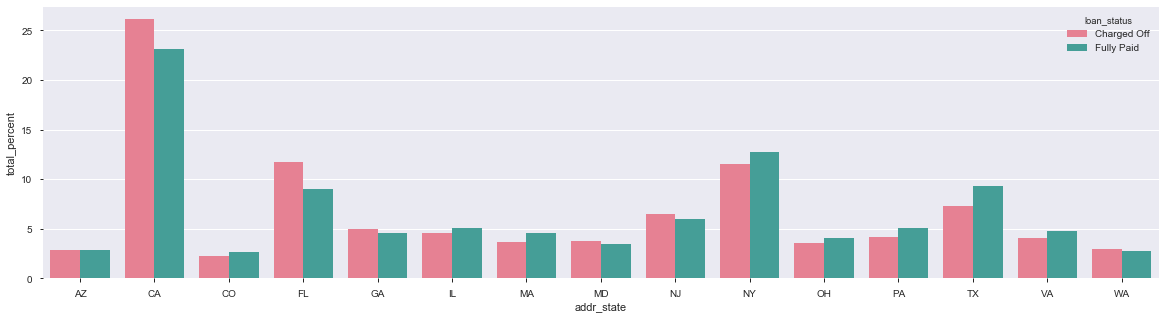

In [0]:
plt.figure(figsize=(20,5))
feature='addr_state'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='husl'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 1440x360 with 0 Axes>

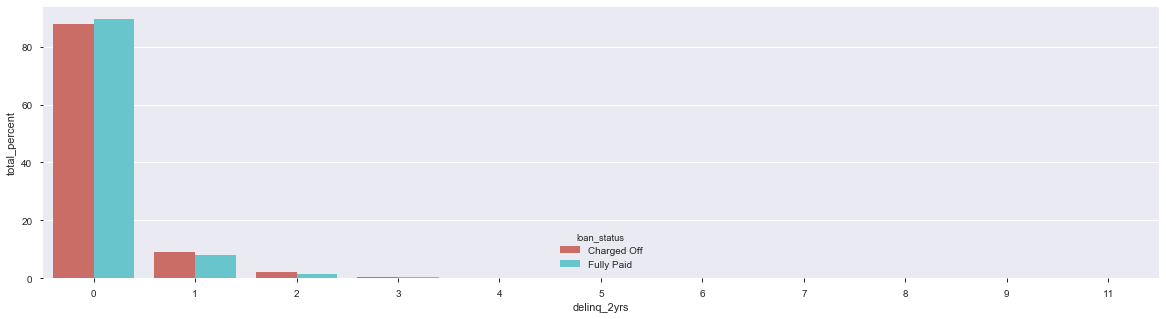

In [0]:
plt.figure(figsize=(20,5))
feature='delinq_2yrs'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='hls'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 1440x360 with 0 Axes>

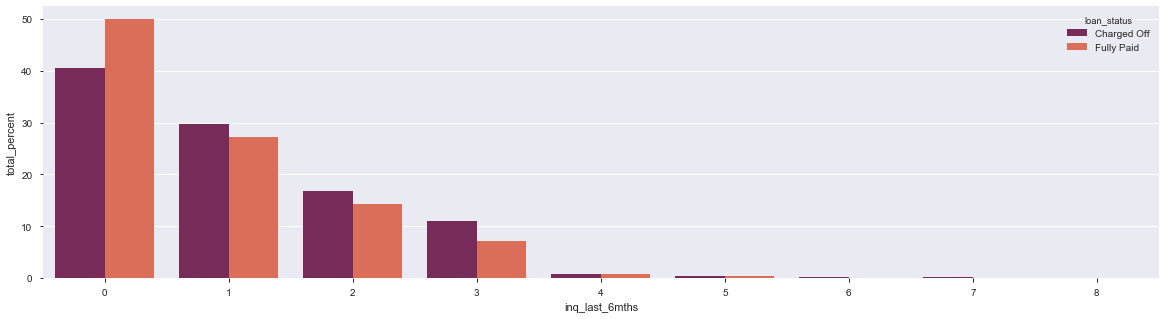

In [0]:
plt.figure(figsize=(20,5))
feature='inq_last_6mths'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='rocket'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 1440x360 with 0 Axes>

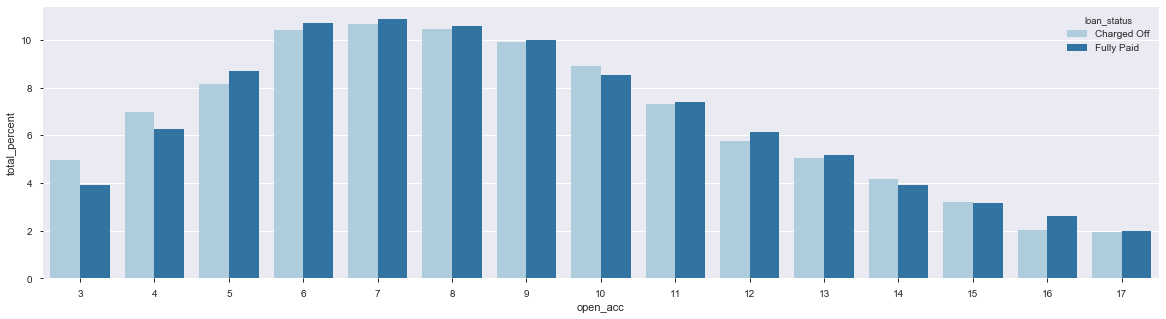

In [0]:
plt.figure(figsize=(20,5))
feature='open_acc'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='Paired'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 1440x360 with 0 Axes>

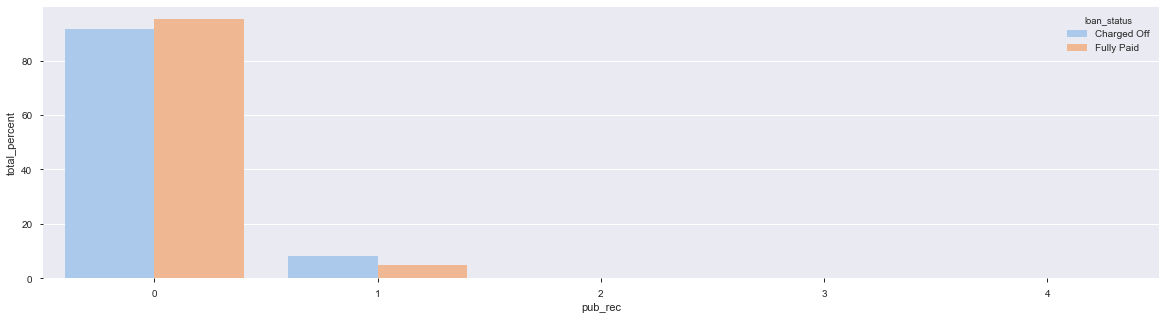

In [0]:
plt.figure(figsize=(20,5))
feature='pub_rec'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='pastel'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 576x288 with 0 Axes>

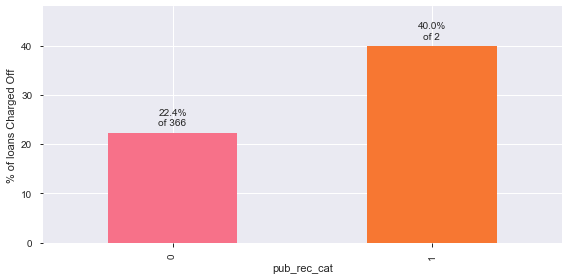

In [0]:
feature='pub_rec_bankruptcies'
bins = [i for i in range(0,3)]
labels = [i for i in range(0,2)]
temp=train.copy()
temp['pub_rec_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
feature='pub_rec_cat'
plt.figure(figsize=(8,4))
ax=eda.plotLoanStatus(temp, feature)

###  <font color='blue'></font>  <font color='red'>Percentage of Default increases with increasing Number of public record bankruptcies</font> 


<Figure size 1440x360 with 0 Axes>

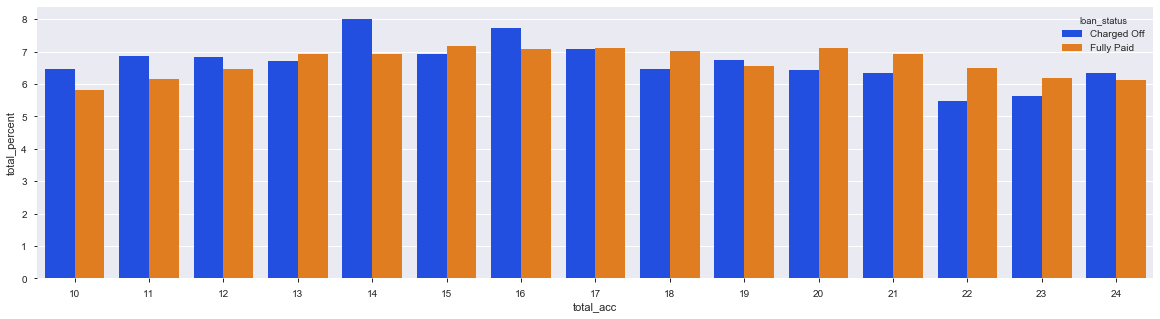

In [0]:
plt.figure(figsize=(20,5))
feature='total_acc'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='bright'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 1440x360 with 0 Axes>

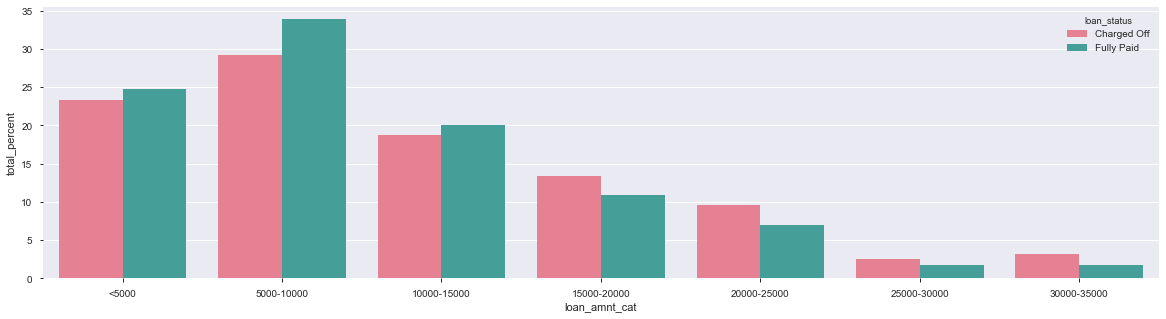

In [0]:
feature='loan_amnt'
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = [ '<5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
temp=train.copy()
temp['loan_amnt_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
plt.figure(figsize=(20,5))
cmap='husl'
feature='loan_amnt_cat'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 1080x360 with 0 Axes>

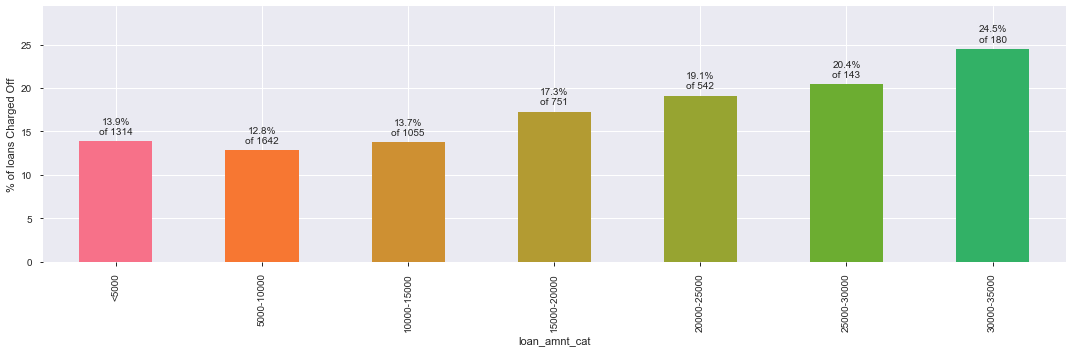

In [0]:
plt.figure(figsize=(15,5))
feature='loan_amnt'
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = [ '<5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
temp=train.copy()
temp['loan_amnt_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
ax=eda.plotLoanStatus(temp, 'loan_amnt_cat')

###  <font color='blue'></font>  <font color='red'>There are more cases of default with increase in loan amounts</font> 

<Figure size 1440x576 with 0 Axes>

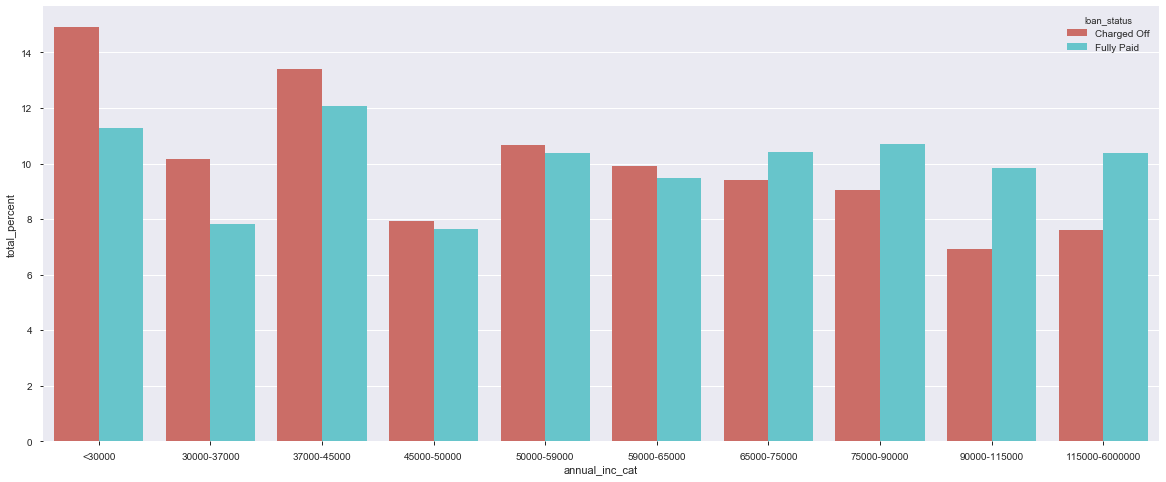

In [0]:
feature='annual_inc'
bins = [0, 30000, 37000, 45000,50000,59000,65000,75000,90000,115000,6000000]
labels = [ '<30000','30000-37000','37000-45000','45000-50000','50000-59000','59000-65000','65000-75000','75000-90000','90000-115000','115000-6000000']
temp=train.copy()
temp['annual_inc_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
plt.figure(figsize=(20,8))
cmap='hls'
feature='annual_inc_cat'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

<Figure size 1080x360 with 0 Axes>

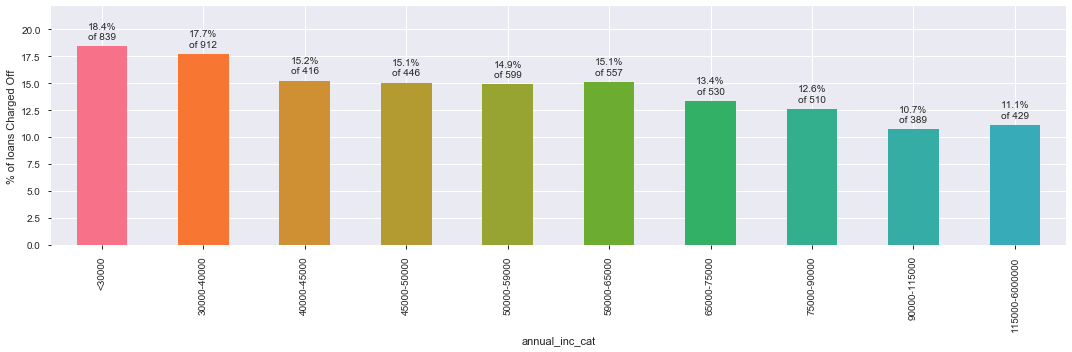

In [0]:
plt.figure(figsize=(15,5))
feature='annual_inc'
bins = [0, 30000, 40000, 45000,50000,59000,65000,75000,90000,115000,6000000]
labels = [ '<30000','30000-40000','40000-45000','45000-50000','50000-59000','59000-65000','65000-75000','75000-90000','90000-115000','115000-6000000']
temp=train.copy()
temp['annual_inc_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
ax=eda.plotLoanStatus(temp, 'annual_inc_cat')

###  <font color='blue'></font>  <font color='red'>There are significantly more cases of default for applicants having annual income less than 40000</font> 

<Figure size 576x288 with 0 Axes>

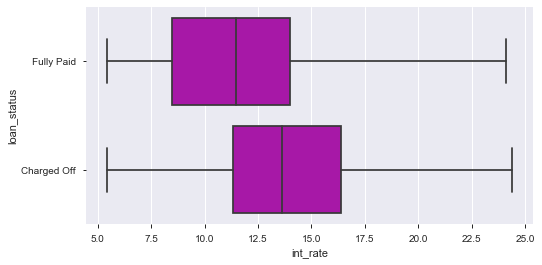

In [0]:
plt.figure(figsize=(8, 4))
ax=sns.boxplot(x='int_rate',y='loan_status',data=train, whis=np.inf, color="m")

<Figure size 864x360 with 0 Axes>

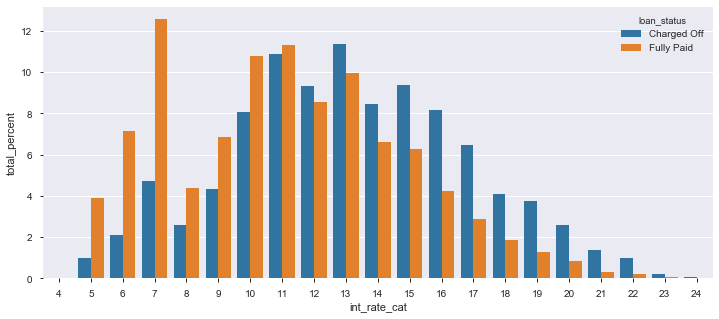

In [0]:
feature='int_rate'
bins = [i for i in range(4,26)]
labels = [i for i in range(4,25)]
temp=train.copy()
temp['int_rate_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
feature='int_rate_cat'
plt.figure(figsize=(12,5))
temp= temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent)

###  <font color='blue'></font>  <font color='red'>Loans with interest rates equal and above 12% are more probable to default</font> 

<Figure size 864x360 with 0 Axes>

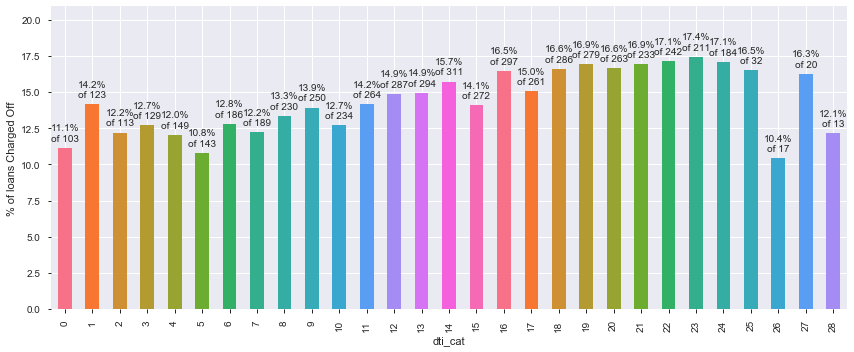

In [0]:
feature='new_dti'
bins = [i for i in range(0,30)]
labels = [i for i in range(0,29)]
temp=train.copy()
temp['dti_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
feature='dti_cat'
plt.figure(figsize=(12,5))
ax=eda.plotLoanStatus(temp, feature)

###  <font color='blue'></font>  <font color='red'>Percentage of Default increases with increasing Debt to Income Ratio</font> 

<Figure size 576x288 with 0 Axes>

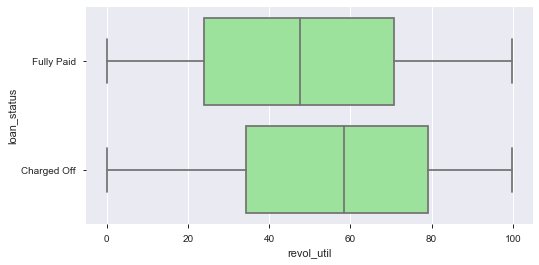

In [0]:
plt.figure(figsize=(8, 4))
ax=sns.boxplot(x='revol_util',y='loan_status',data=train, whis=np.inf,color="lightgreen")

<Figure size 864x360 with 0 Axes>

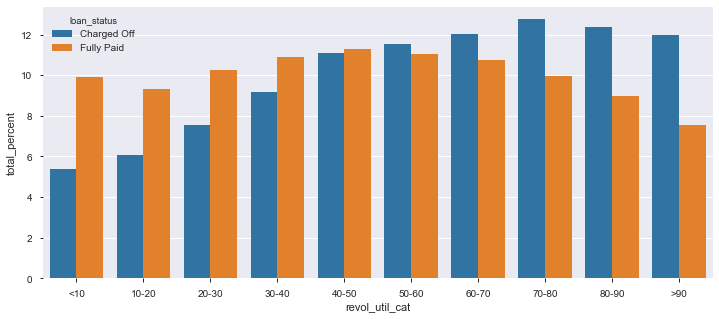

In [0]:
feature='revol_util'
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [ '<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90', '>90']
temp=train.copy()
temp['revol_util_cat'] = pd.cut(temp[feature], bins=bins, labels=labels)
feature='revol_util_cat'
plt.figure(figsize=(12,5))
temp= temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent)

###  <font color='blue'></font>  <font color='red'>Loans with Revolving line utilization rate above 50% are more probable to default</font> 

<Figure size 1440x360 with 0 Axes>

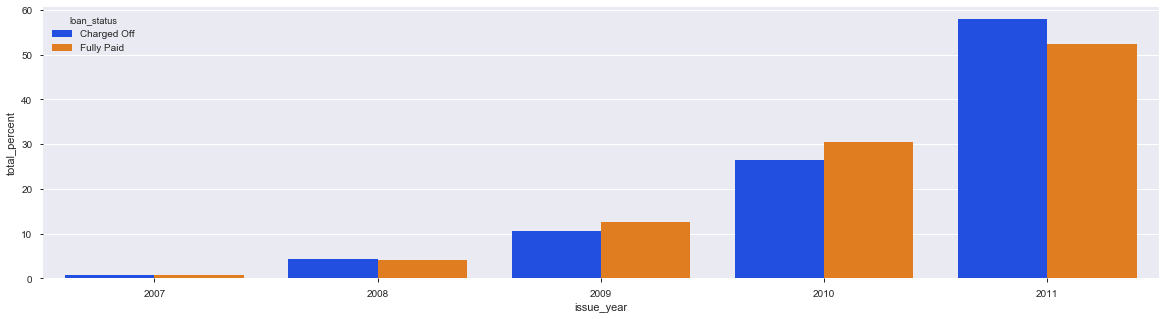

In [0]:
plt.figure(figsize=(20,5))
feature='issue_year'
top=train[feature].value_counts().nlargest(15).index
temp=train[train[feature].isin(top)]
cmap='bright'
temp = temp.groupby(['loan_status',feature])[feature].count()
temp_percent = temp.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
ax=sns.barplot(y="total_percent",x=feature,hue="loan_status",data=temp_percent,palette=cmap)

###  <font color='blue'></font>  <font color='red'>Higher percentage of loans were charged off in 2011</font> 

<Figure size 1080x576 with 0 Axes>

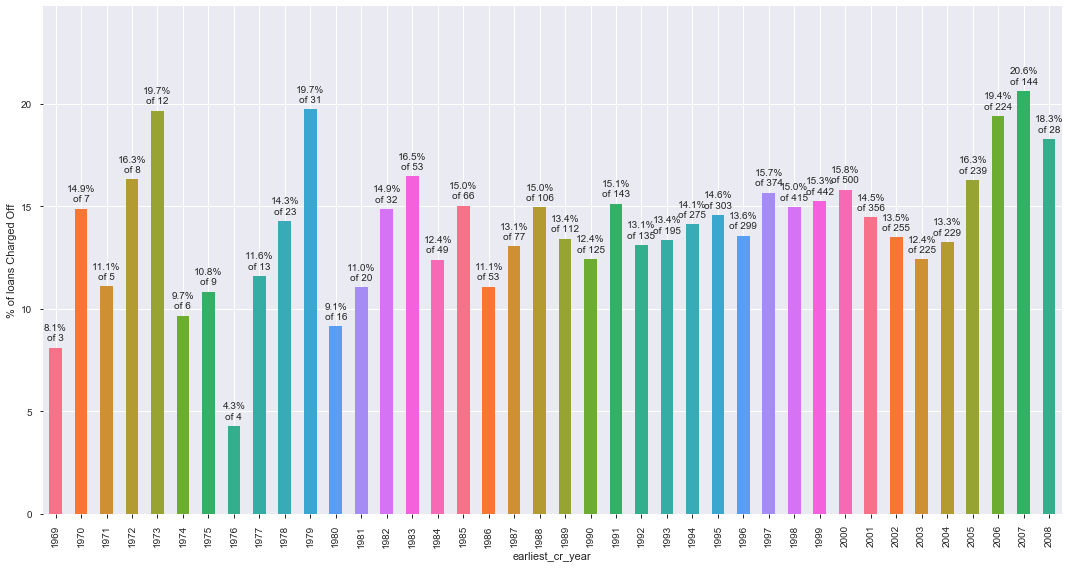

In [0]:
#plt.figure(figsize=(15,5))
plt.figure(figsize=(15,8))
feature='earliest_cr_year'
ax=eda.plotLoanStatus(train[train[feature]>1968], feature)

###  <font color='blue'></font>  <font color='red'>People who took their first loans during an economic crisis (OPEC oil price shock of 1973, Recession of 1980 and Financial crisis of 2007–2008) have higher rates of default</font> 

In [0]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
expected = train.groupby('issue_mnth')['loan_amnt'].mean()
temp=train[train['issue_mnth']==1]
df1=temp.groupby('issue_mnth')['loan_amnt'].mean()
expected=expected.append(df1)
actual = train.groupby('issue_mnth')['funded_amnt'].mean()
temp=train[train['issue_mnth']==1]
df2=temp.groupby('issue_mnth')['funded_amnt'].mean()
actual=actual.append(df2)
# Initialise the spider plot by setting figure size and polar projection
ax=plt.figure(figsize=(10, 6))
ax=plt.subplot(polar=True)
theta = np.linspace(0, 2 * np.pi, len(actual))
lines, labels = plt.thetagrids(range(0, 360, int(360/len(months))), (months))
ax=plt.plot(theta, actual) # Plot actual sales graph
ax=plt.fill(theta, actual, 'b', alpha=0.1)
ax=plt.plot(theta, expected) # Plot expected sales graph
ax=plt.legend(labels=('Applied', 'Funded'), loc=1) # Add legend and title for the plot
ax=plt.title("Monthwise Values")
plt.show()

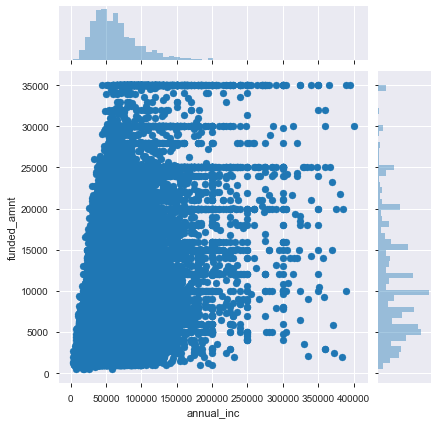

In [0]:
ax=sns.jointplot('annual_inc','funded_amnt',train[train['annual_inc']<400000])

###  <font color='blue'></font>  <font color='red'>High-value loans have been extended to people with low annual income</font> 

In [0]:
train['total_pymnt'][train['loan_status']=='Charged Off'].sum() / train['funded_amnt'][train['loan_status']=='Charged Off'].sum()

0.5817917916642846

###  <font color='blue'></font>  <font color='red'>The lender is able to recover 58% for the loans which have defaulted</font> 

In [0]:
Loan_Amount = []
Average_Balance = []
Default_Rate = []
Weighted_Rate = []
Average_Income = []
Average_Employment_Length = []
Average_DTI = []
Average_Inq_6 = []
temp=train.copy()
year=sorted(train['issue_year'].unique())
for i in year:
    new_df = temp[temp['issue_year'] == i]
    
    Loan_Sum = sum(new_df['funded_amnt'])
    Loan_Amount.append(Loan_Sum)
    
    Average_Balance.append(Loan_Sum/len(new_df['funded_amnt']))
    
    Defaults = []
    for value in new_df.loan_status:
        if value == 'Charged Off':
            Defaults.append(1)
    Default_R = 100* len(Defaults) / len(new_df.loan_status)  
    Default_Rate.append(Default_R)
    
    new_df['weighted'] = (new_df['int_rate']/100)*new_df['funded_amnt']
    Weighted_Sum = sum(new_df['weighted'])
    Weighted_i_rate = 100* Weighted_Sum / Loan_Sum
    Weighted_Rate.append(Weighted_i_rate)
    
    Income_Average = np.mean(new_df['annual_inc'])
    Average_Income.append(Income_Average)
    

    Employ_Length = []
    for term in new_df.emp_length:
        if term == '10+ years':
            Employ_Length.append(10)
        if term == '< 1 year':
            Employ_Length.append(0.5)    
        if term == '1 year':
            Employ_Length.append(1)
        if term == '3 years':
            Employ_Length.append(3)
        if term == '8 years':
            Employ_Length.append(8)
        if term == '9 years':
            Employ_Length.append(9)    
        if term == '4 years':
            Employ_Length.append(4)
        if term == '5 years':
            Employ_Length.append(5)
        if term == '6 years':
            Employ_Length.append(6)
        if term == '2 years':
            Employ_Length.append(2)    
        if term == '7 years':
            Employ_Length.append(7)
        if term == 'n/a':
            Employ_Length.append(0)  
            
    Average_Employment_Length.append(np.mean(Employ_Length))        
    
    DTI_Average = np.mean(new_df['dti'])
    Average_DTI.append(DTI_Average)
    
    inquiry_average_6 = np.mean(new_df['inq_last_6mths'])
    Average_Inq_6.append(inquiry_average_6)

In [0]:
combine_data = OrderedDict([ ('issue_year', year),
                         ('Loan_Funding',Loan_Amount),
                         ('Avg_Balance', Average_Balance),
                         ('Default_Rate',  Default_Rate),
                         ('Weighted_Rate', Weighted_Rate),
                         ('Avg_Income', Average_Income),
                         ('Avg_Employment_Length', Average_Employment_Length),
                         ('Avg_DTI', DTI_Average),
                         ('6m_Inquiries', Average_Inq_6)])
df_plot = pd.DataFrame.from_dict(combine_data)
df_plot.index=df_plot['issue_year']
df_plot = df_plot.drop(['issue_year'],axis=1)
df_plot

,Loan_Funding,Avg_Balance,Default_Rate,Weighted_Rate,Avg_Income,Avg_Employment_Length,Avg_DTI,6m_Inquiries
issue_year,,,,,,,,
2007,2152175,8574.402390,17.928287,10.731657,72262.675896,NaN,13.793865,1.011952
2008,13457075,8615.284891,15.813060,11.529849,65119.687759,NaN,13.793865,1.046095
2009,46324425,9822.821247,12.595420,12.586057,68100.735068,NaN,13.793865,1.002969
2010,116635400,10114.065210,12.877211,12.204929,68892.323494,NaN,13.793865,0.869580
2011,237447550,11573.774128,15.870540,13.000962,69105.267384,NaN,13.793865,0.827793


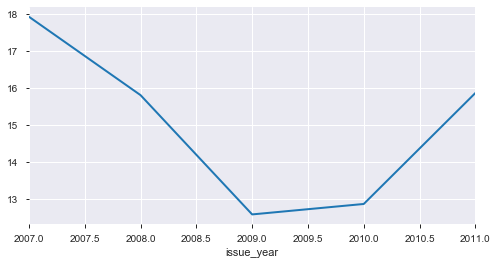

In [0]:
df_plot['Default_Rate'].sort_index().plot(figsize=(8,4), linewidth=2, fontsize=10)

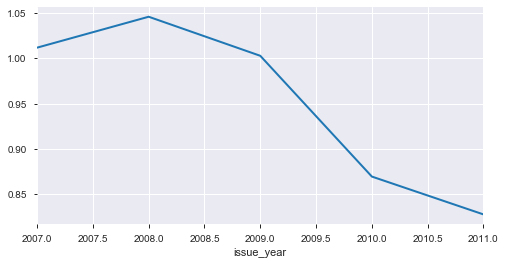

In [0]:
df_plot['6m_Inquiries'].sort_index().plot(figsize=(8,4), linewidth=2, fontsize=10)

###  <font color='blue'></font>  <font color='red'>Default Rate had come down with regular inquiries in past 6 mnths. But failing to maintain that default rate is on the rise again</font> 

In [0]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_mnths', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'issue_mnth',
       'issue_year', 'earliest_cr_year', 'new_dti'],
      dtype='object')

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term_mnths                 38577 non-null int64
int_rate                   38577 non-null float64
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null float64
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null datetime64[ns]
loan_status                38577 non-null object
purpose                    38577 non-null object
title                      38466 non-null object
zip_code                   38577 non-null object

In [0]:
train['issue_mnth']=train['issue_mnth'].astype('object')
train['issue_year']=train['issue_year'].astype('object')
train['earliest_cr_year'] =train['earliest_cr_year'].astype('object')

### Missing Value Treatment

In [0]:
train.shape

(38577, 45)

In [0]:
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

emp_title               2386
emp_length              1033
title                   111 
revol_util              50  
last_pymnt_d            71  
last_credit_pull_d      2   
pub_rec_bankruptcies    697 
dtype: int64

In [0]:
train=train.drop(['emp_title','title'],axis=1)
train=train.drop(dat_attributes, axis=1)

In [0]:
#Multicollinearity
train=train.drop(['out_prncp','out_prncp_inv','total_rec_prncp','total_rec_int','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_pymnt','dti','installment'], axis=1)

In [0]:
print(train.shape)
train=train.dropna()
print(train.shape)

(38577, 29)
(36800, 29)


In [0]:
j=0
num_attributes = train.select_dtypes(include=['int','int64','float','float64']).columns
temp=train[num_attributes].dropna()
ds = pd.DataFrame(columns=['feature','vif'])
vif = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
for i in range(temp.shape[1]):
    ds.loc[j, ['feature']]=temp.columns[i]
    ds.loc[j, ['vif']]= vif[i]
    j=j+1
sorted(zip(ds['vif'],ds['feature']),reverse=True)

[(22.15538912963233, 'int_rate'),
 (17.494734952796417, 'term_mnths'),
 (11.09914359694436, 'open_acc'),
 (10.423922691092761, 'total_acc'),
 (6.8154366706257505, 'revol_util'),
 (6.329037458772425, 'new_dti'),
 (5.640340238912215, 'loan_amnt'),
 (3.648216505300915, 'pub_rec'),
 (3.5854354232708783, 'pub_rec_bankruptcies'),
 (3.11470688269561, 'emp_length'),
 (2.860674994266101, 'recoveries'),
 (2.733155888254271, 'collection_recovery_fee'),
 (2.584398041422086, 'annual_inc'),
 (2.4705529964970063, 'revol_bal'),
 (1.8791862238179327, 'last_pymnt_amnt'),
 (1.7755824471598993, 'inq_last_6mths'),
 (1.1826797204941155, 'delinq_2yrs'),
 (1.0648065021781334, 'total_rec_late_fee')]

In [0]:
train.columns

Index(['loan_amnt', 'term_mnths', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issue_mnth', 'issue_year', 'earliest_cr_year', 'new_dti'],
      dtype='object')

In [0]:
clean_loan=train.drop_duplicates()
clean_loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

In [0]:
train=train.drop(['int_rate'],axis=1)

## Label Encoding

train=pd.read_csv('clean_loan.csv')

In [0]:
X = train.drop(['loan_status'],axis=1)
y = train['loan_status'].copy()
print(X.shape,y.shape)

(36800, 27) (36800,)


In [0]:
num_attributes = X.select_dtypes(include=['int','int64','float','float64']).columns
cat_attributes = X.select_dtypes(include=['object']).columns

In [0]:
di = {'Fully Paid'   : 0, 
      'Charged Off'  : 1
     }
y.replace(di, inplace=True)
#y=y.astype('int64')

In [0]:
for i in cat_attributes :
    X[i],_ = pd.factorize(X[i])

## Data Standardization and Splitting

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36800 entries, 0 to 39680
Data columns (total 27 columns):
loan_amnt                  36800 non-null int64
term_mnths                 36800 non-null int64
grade                      36800 non-null int64
sub_grade                  36800 non-null int64
emp_length                 36800 non-null float64
home_ownership             36800 non-null int64
annual_inc                 36800 non-null float64
verification_status        36800 non-null int64
purpose                    36800 non-null int64
zip_code                   36800 non-null int64
addr_state                 36800 non-null int64
delinq_2yrs                36800 non-null int64
inq_last_6mths             36800 non-null int64
open_acc                   36800 non-null int64
pub_rec                    36800 non-null int64
revol_bal                  36800 non-null int64
revol_util                 36800 non-null float64
total_acc                  36800 non-null int64
total_rec_late_fee   

In [0]:
X=X.drop(['revol_bal','total_acc','sub_grade','zip_code','addr_state','verification_status','emp_length',
          'pub_rec_bankruptcies','delinq_2yrs','open_acc'],axis=1) #'annual_inc'   addr state

In [0]:
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
print(model.summary())  
# sampling variability leads to the std error
# t value = estimate/std error || t value higher the better 
# p value =  probability of putting model in rejection region 
#R2= explained variation/total variation || (0~1) = variance explained by the model
# F statistic = overall significance of the model

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     672.9
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:18:13   Log-Likelihood:                -8619.2
No. Observations:               36800   AIC:                         1.727e+04
Df Residuals:                   36782   BIC:                         1.743e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [0]:
features = X.columns
features

Index(['loan_amnt', 'term_mnths', 'grade', 'home_ownership', 'annual_inc',
       'purpose', 'inq_last_6mths', 'pub_rec', 'revol_util',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'issue_mnth', 'issue_year', 'earliest_cr_year',
       'new_dti'],
      dtype='object')

In [0]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=3,stratify=y)

## Model1 : Logistic Regression

In [0]:
lm = LogisticRegression(solver='lbfgs')
model = lm.fit(X_train, y_train)
#y_pred=model.predict(X_test)
print('Logistic  Model Accuracy:')
cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')

Logistic  Model Accuracy:


array([0.93602282, 0.93518141, 0.94170404])

## Model 2 : K Means

In [0]:
km = KMeans(n_clusters=2,n_init=10, max_iter=300)
model = km.fit(X_Train)
#y_pred =km.predict(X_test)
cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')

## Model 3 & 4: Decision Tree (Entropy & Gini)

In [0]:
dt_entropy=DecisionTreeClassifier(criterion = "entropy",random_state=0,max_depth=9,min_samples_leaf=3) 
dt_entropy.fit(X_train, y_train)
print('DT Entropy Model Accuracy:')
cross_val_score(dt_entropy, X_test, y_test, cv=3, scoring='accuracy')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

DT Entropy Model Accuracy:


array([0.95273024, 0.95311863, 0.95841826])

In [0]:
dt_gini= DecisionTreeClassifier(criterion = "gini", random_state = 100) 
dt_gini.fit(X_train, y_train)
print('DT Gini Model Accuracy:')
cross_val_score(dt_gini, X_test, y_test, cv=3, scoring='accuracy')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

DT Gini Model Accuracy:


array([0.92991035, 0.93844272, 0.93355075])

## Model 5 & 6: Random Forest (Entropy & Gini)

In [0]:
rf_entropy = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state=0)
rf_entropy.fit(X_train, y_train)
y_pred = rf_entropy.predict(X_test)
print('RF Entropy Model Accuracy:')
cross_val_score(rf_entropy, X_test, y_test, cv=3, scoring='accuracy')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

RF Entropy Model Accuracy:


array([0.96495518, 0.96494089, 0.96453322])

In [0]:
rf_gini = RandomForestClassifier(n_estimators = 50, criterion = 'gini', random_state=0)
rf_gini.fit(X_train, y_train)
#y_pred = rf_gini.predict(X_test)
print('RF Gini Model Accuracy:')
cross_val_score(rf_gini, X_test, y_test, cv=3, scoring='accuracy')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

RF Gini Model Accuracy:


array([0.96454768, 0.96453322, 0.96534855])

print("Significance of the Variables :")
list(sorted(zip( np.round(rf_entropy.feature_importances_, 4), features), reverse=True))

Text(0, 0.5, 'Relative Importance')

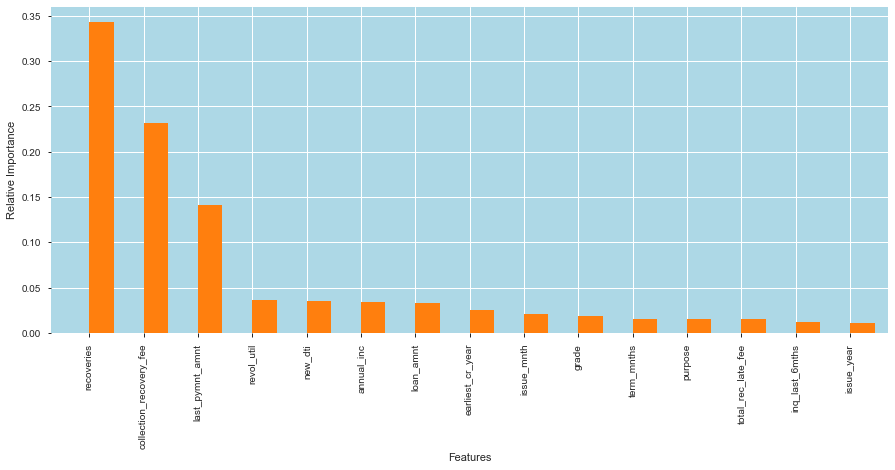

In [0]:
r = pd.DataFrame(columns=['Feature','Importance'])
ncomp = 15
r['Features'] = features
r['Importance'] = rf_entropy.feature_importances_
r.set_index(r['Features'], inplace=True)
ax = r.sort_values('Importance', ascending=False)[:ncomp].plot.bar(width=0.9, legend=False, figsize=(15,6))
ax.set_facecolor('lightblue')
ax.set_ylabel('Relative Importance')

## Model 7: Linear Discriminant Analysis 

In [0]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train,y_train)
cross_val_score(model_lda, X_test, y_test, cv=3, scoring='accuracy')

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

array([0.88467808, 0.8887077 , 0.88748471])

###  <font color='blue'>We are able to predict Loan Deafults using important features achieving an accuracy of </font>  <font color='red'>96.5%</font> but we need to improve Recall Value as we need to minimize False Negatives

### Hyperparameter Tuning

![Image](https://i.imgur.com/uipmEwt.png)

![Image](https://miro.medium.com/max/1000/1*y4HwoAEgx1Js19hCkPM7XA.png)

#### As most of the loans are not in default, the specificity has a much higher weight than the sensitivity in the accuracy calculation.  And by business sense, the Type II Errors or the Flse Negatives need to be minimized, we refit the score by Recall

In [0]:
grid_search_clf = eda.grid_search_wrapper(X,y,refit_score='recall_score')

#Best params for precision_score
#{'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 50}

#Best params for recall_score
#{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': s50}

#Best params for recall_score
#{'criterion': 'gini', 'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 300}

Best params for recall_score
{'criterion': 'gini', 'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 300}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg  6291      16      
pos  226       827     


results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_min_samples_split', 'param_n_estimators']].round(3).head() #'param_max_features',

In [0]:
#rf_entropy = RandomForestClassifier(n_estimators = 50,criterion ='entropy',random_state=0,max_depth=25,min_samples_split=5)
rf_entropy = RandomForestClassifier(criterion='gini',max_depth= 25,max_features= 10,min_samples_leaf= 3,min_samples_split=3,n_estimators=300,n_jobs=-1)
rf_entropy.fit(X_train, y_train)
y_pred = rf_entropy.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

###  Confusion Matrix and Other Metrics

In [0]:
#print(confusion_matrix(y_test, y_pred, labels=None, sample_weight=None),"\n")
#print(roc_auc_score(y_test, y_pred))
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True),"\n")
print(classification_report(y_test, y_pred,target_names = ['Fully Paid','Charged Off']))

Predicted     0    1   All
True                      
0          6294  13   6307
1          225   828  1053
All        6519  841  7360 

              precision    recall  f1-score   support

  Fully Paid       0.97      1.00      0.98      6307
 Charged Off       0.98      0.79      0.87      1053

    accuracy                           0.97      7360
   macro avg       0.98      0.89      0.93      7360
weighted avg       0.97      0.97      0.97      7360



### Determinants of Borrowers' Default :
> Debt to Income Ratio

> Revolving Credit Utilization

> Loan Grade

> Loan Amount

> Loan Term

> Annual Income

> Loan Purpose

> Recent Inquiries

> Home Ownership